# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [346]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [347]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [348]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
# loading data into a pandas dataframe
credit_approval = pd.read_csv("/content/drive/My Drive/aa-project-4/personal_loan/Loan_Modelling.csv")

In [350]:
df = credit_approval.copy()


## Data Overview

* Observations
* Sanity checks

First and last 5 rows of the dataset.

In [351]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Last 5 rows of data

In [352]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Shape of the dataset**

In [353]:
df.shape

(5000, 14)

Observations: The dataset has 5000 rows and 14 columns

**Statistical Summary**

In [354]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations:**

*   The average age is 45.34 years with a standard deviation of 11.46, ranging from 23 to 67 years.

*   The average experience is 20.1 years, with a standard deviation of 11.47, ranging from -3 to 43 years, with negative values possibly indicating data errors.

*   `The average income is $73,774, with a standard deviation of $46,034, ranging from $8,000 to $224,000.`

*   ZIP codes in the dataset range from 90005 to 96651

*   The average family size is 2.4 members, with sizes ranging from 1 to 4.

*   `The average monthly credit card spending is $1,937.94, with spending ranging from $0 to $10,000.`

*   The average education level is approximately 1.88, with levels ranging from 1 to 3.

*   `The average mortgage value is $56,498, with a standard deviation of $101,714, and a median of $0, indicating that more than half have no mortgage.`

*   9.6% of individuals have taken a personal loan, with the majority not having one.

*   10.4% of individuals have a securities account.

*   6% of individuals have a certificate of deposit (CD) account.

*   59.7% of individuals use online banking.

*   29.4% of individuals have a credit card issued by the bank.


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**

*   The dataset is complete with no missing values across any of the columns.

*   The majority of the columns are integer types, which suggests that many of the variables are likely categorical or discrete numerical values.

*   Only one column (CCAvg) is a floating-point type, likely representing continuous data such as an average or a calculated value.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis

In [356]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [357]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations on Age**

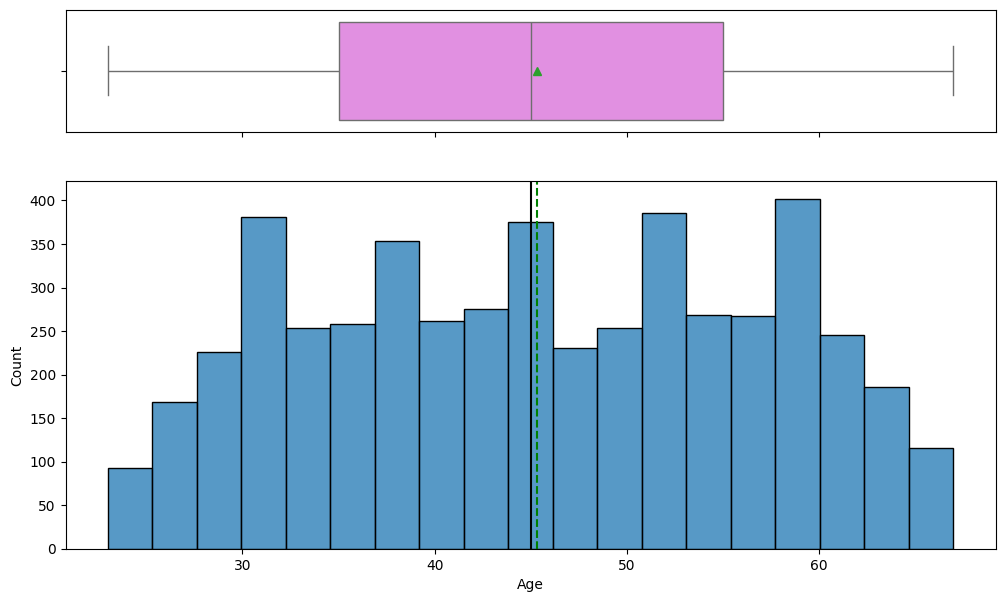

In [358]:
histogram_boxplot(df, "Age")

**Observation:**

The observation for the "Age" variable is that the mean and median are closely aligned, indicating a symmetrical distribution of age data. Additionally, the absence of outliers suggests that the ages in the dataset are consistently within a typical range, with no extreme values skewing the distribution.

**Observations on Experience**

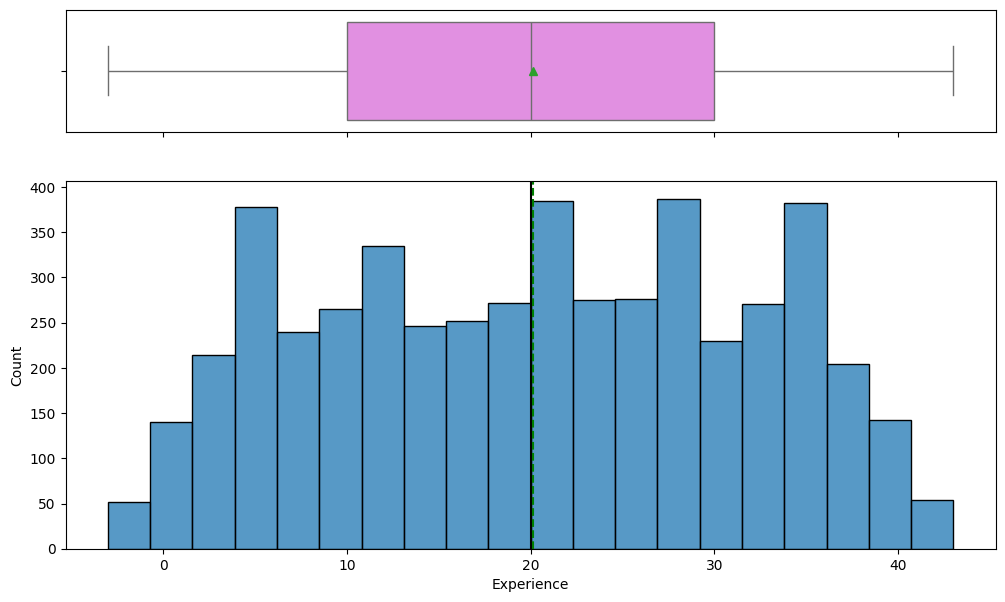

In [359]:
histogram_boxplot(df, "Experience")

**Observations:**

The observation for the "Experience" variable is that the mean and median are identical, indicating a perfectly symmetrical distribution. Furthermore, the absence of outliers suggests that the experience levels in the dataset are evenly distributed without any extreme or unusual values.

**Observations on Income**

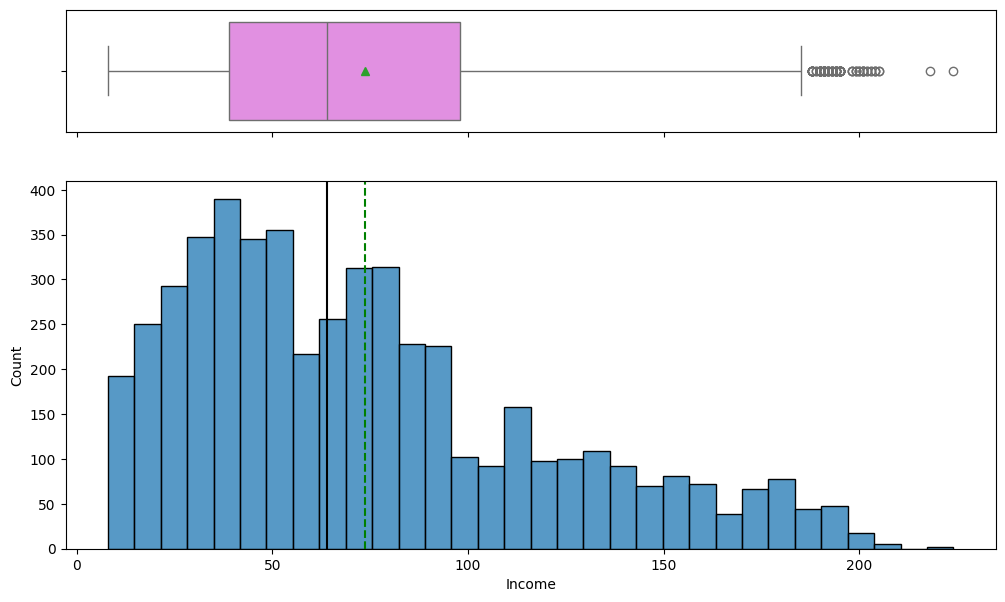

In [360]:
histogram_boxplot(df, "Income")

**Observations:**

The observation for the "Income" variable is that the histogram is right-skewed, indicating that most individuals have lower incomes, with fewer people earning higher amounts. The median income is at 75, suggesting that half of the individuals earn less than this amount, while the other half earn more.

Observations on Family

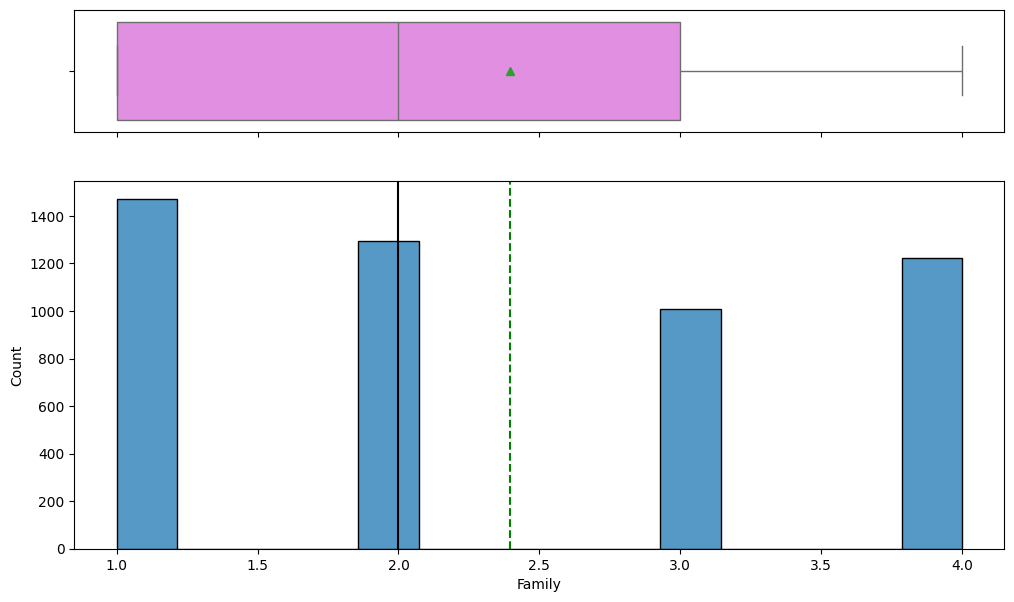

In [361]:
histogram_boxplot(df, "Family")

**Observations:**

The observation for the "Family" variable is that the median is at 2, indicating that half of the households have 2 or fewer family members. The mean is slightly higher at 2.4, suggesting that while most families are around this size, there are a few larger families that increase the average.


**Observations on CCAvg**

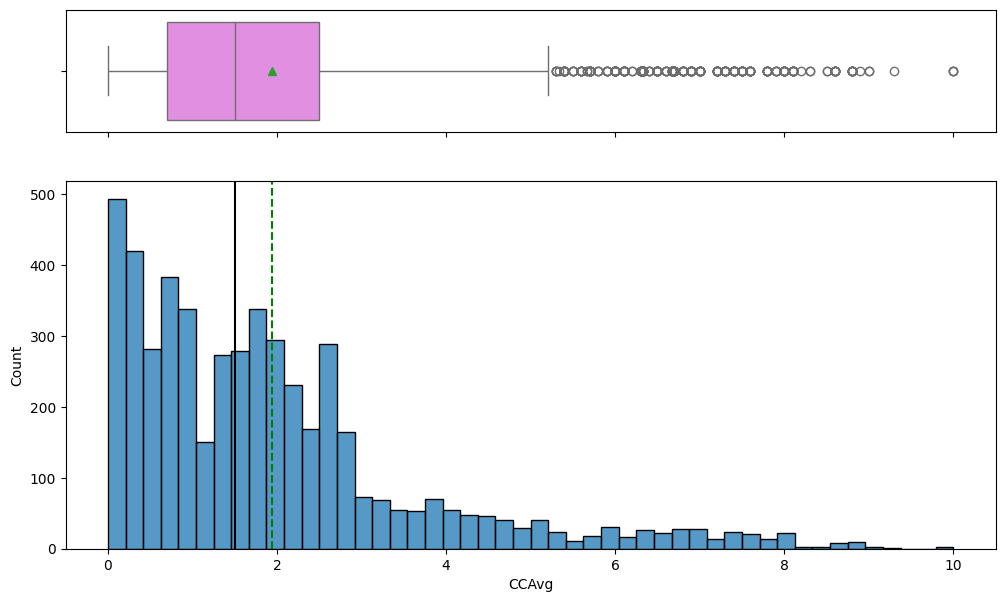

In [362]:
histogram_boxplot(df, "CCAvg")

**Observations:**

The observation for the "CCAvg" variable is that the histogram is right-skewed, meaning that most customers have lower average credit card usage, with fewer customers having higher usage. The mean is at 1.7, while the median is slightly higher at 1.9, indicating a slight concentration of values around the lower end. Additionally, the absence of outliers suggests that the credit card usage data is consistently distributed without any extreme values.

**Observations on Education**

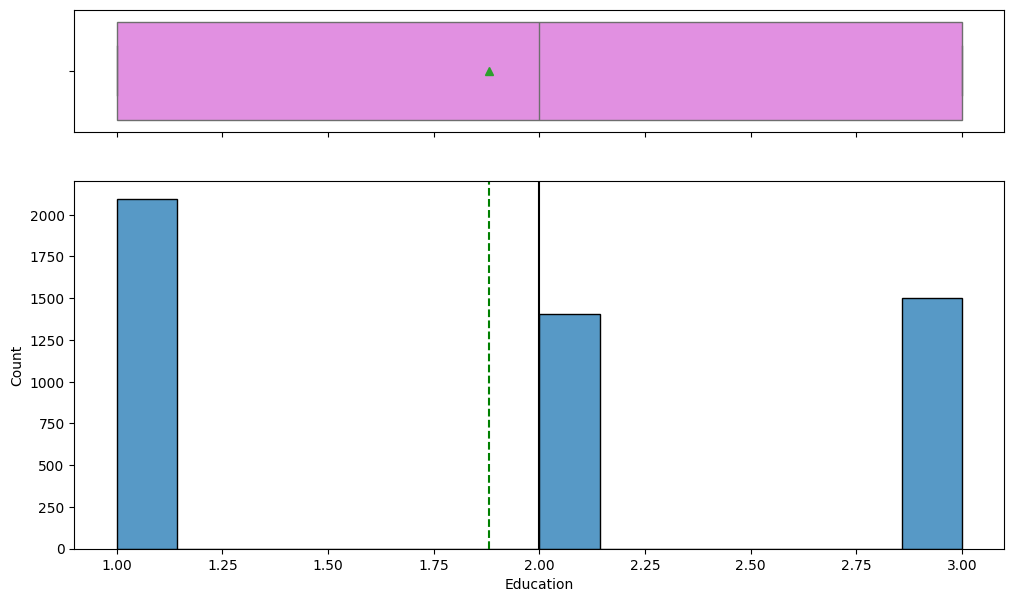

In [363]:
histogram_boxplot(df, "Education")

**Observations:**


The observation for the "Education" variable is that the histogram is right-skewed, indicating that most individuals have lower levels of education, with fewer achieving higher levels. The mean education level is 1.8, while the median is at 2, suggesting a slight concentration around these education levels. The absence of outliers indicates that the education data is consistently distributed, with no extreme values skewing the distribution.

**Observations on Mortgage**

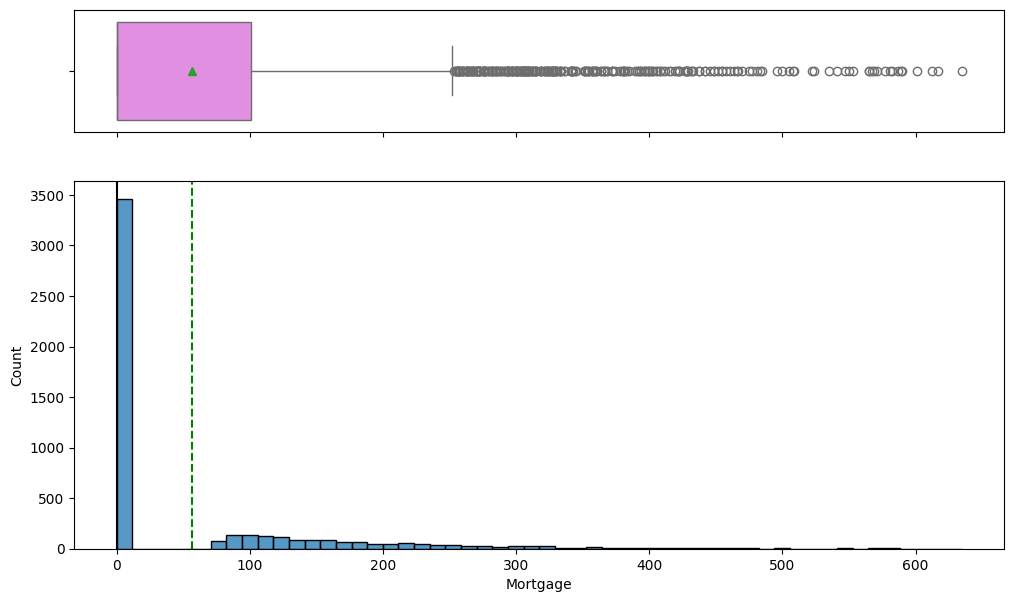

In [364]:
histogram_boxplot(df, "Mortgage")

**Observations on Personal_Loan**

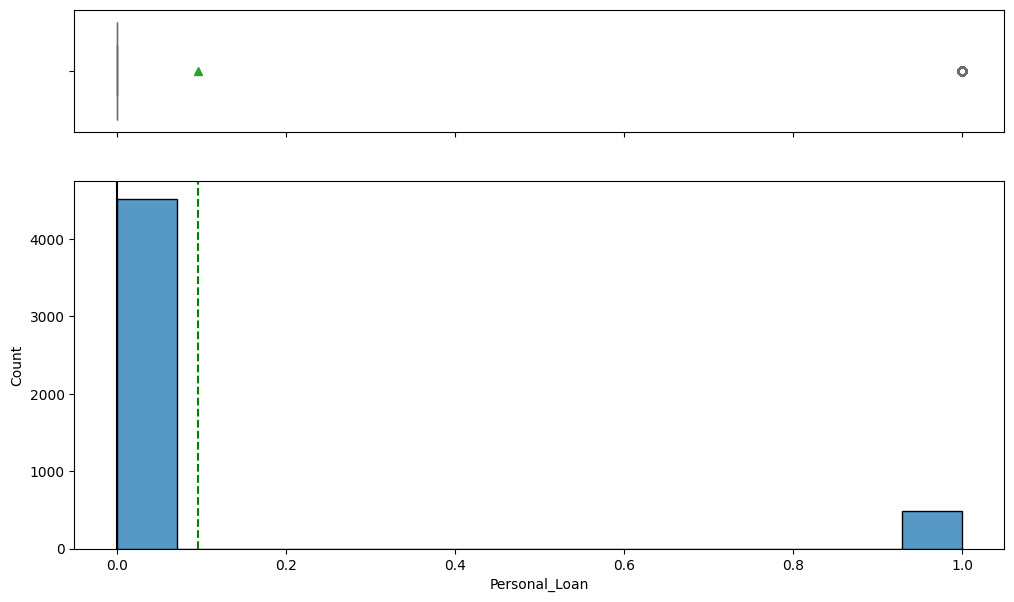

In [365]:
histogram_boxplot(df, "Personal_Loan")

**Observations on Securities_Account**

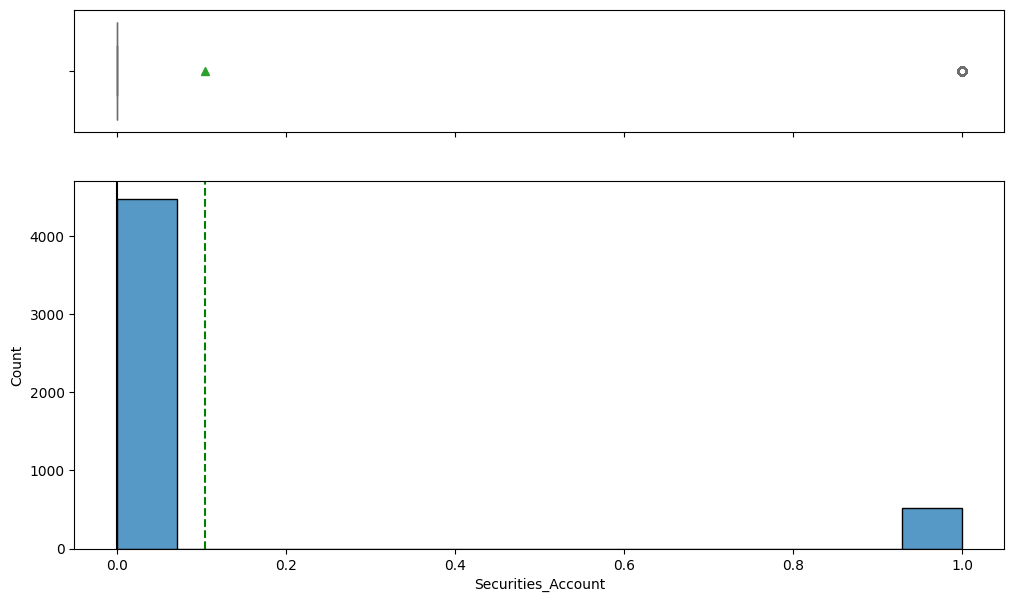

In [366]:
histogram_boxplot(df, "Securities_Account")

**Observations on CD_Account**

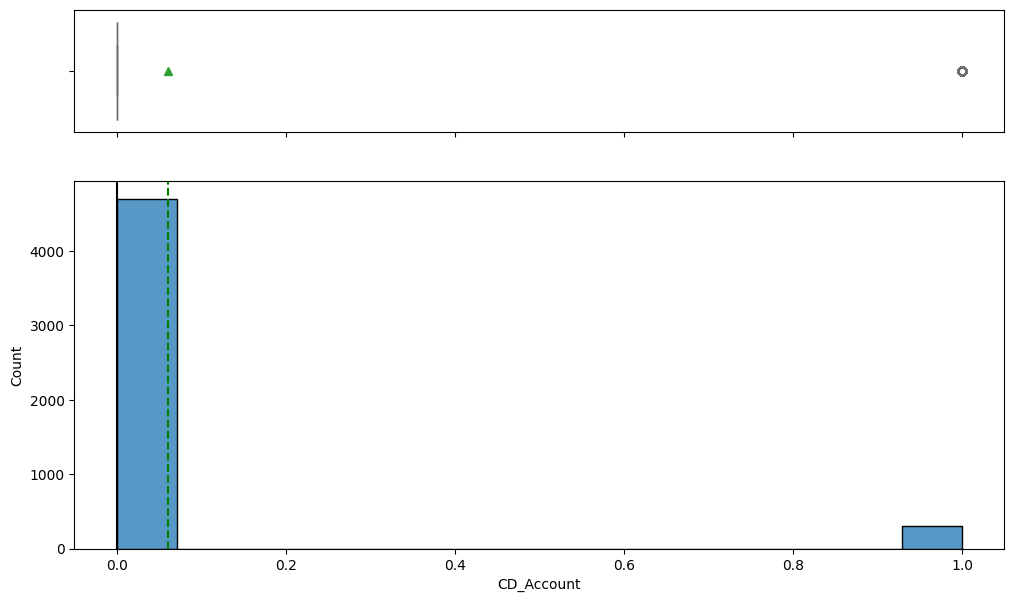

In [367]:
histogram_boxplot(df, "CD_Account")

**Observations on Online**

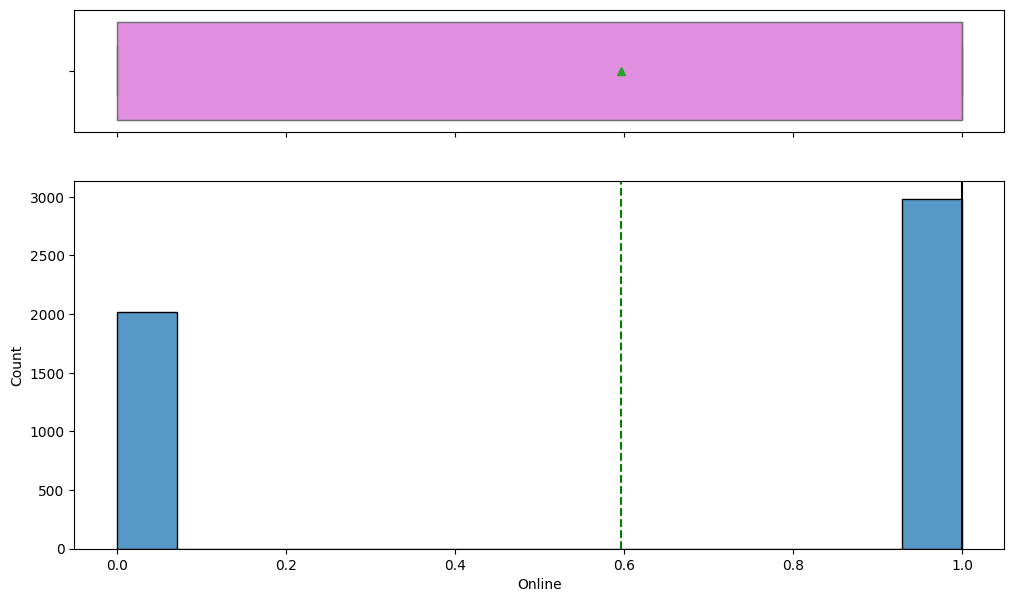

In [368]:
histogram_boxplot(df, "Online")

**Observations on CreditCard**

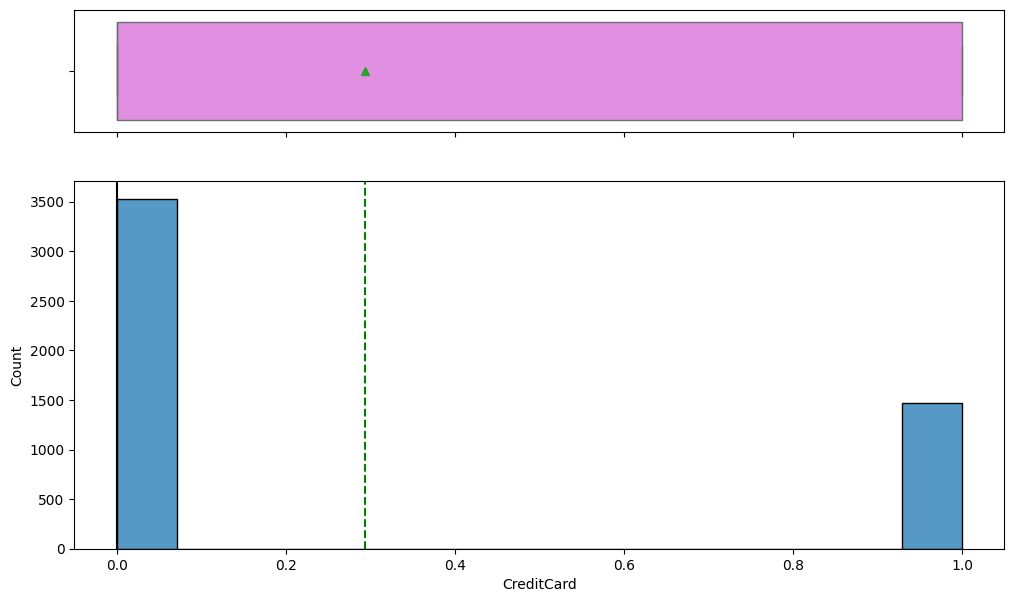

In [369]:
histogram_boxplot(df, "CreditCard")

**Observations on Age**

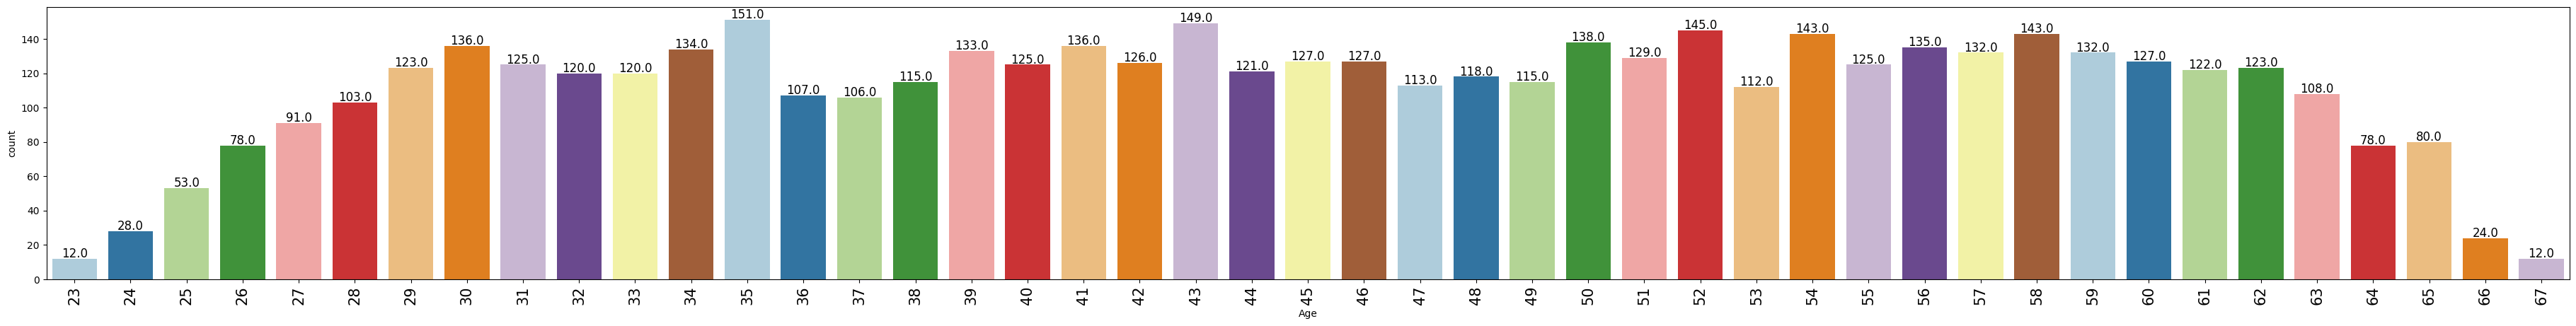

In [370]:
labeled_barplot(df, "Age")

**Observations on Experience**

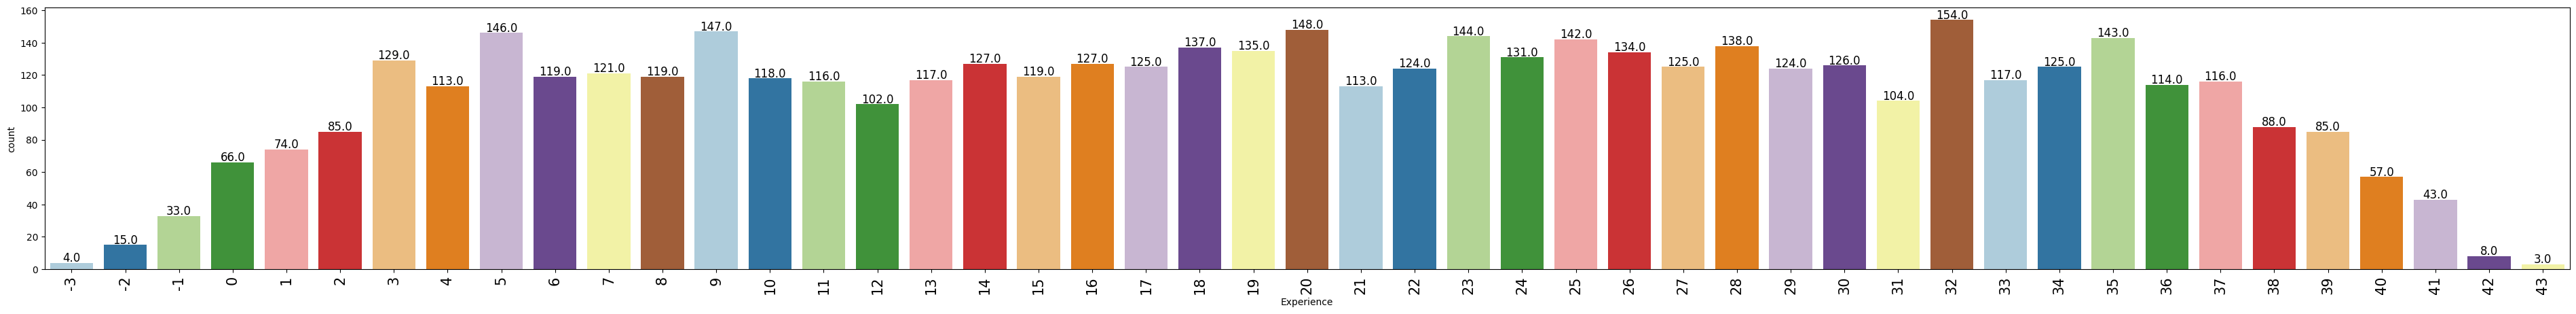

In [371]:
labeled_barplot(df, "Experience")

**Observations on Income**

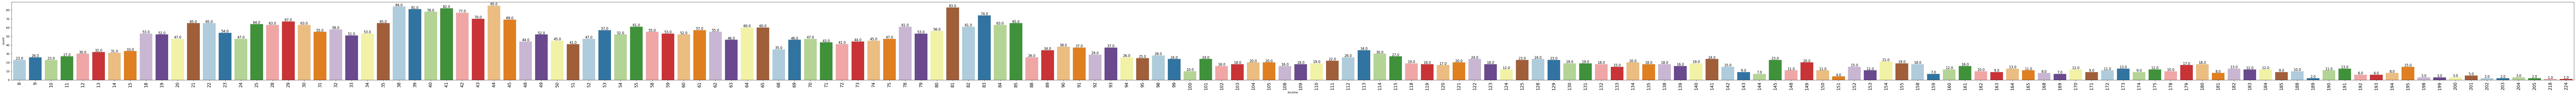

In [372]:
labeled_barplot(df, "Income")

Observations on ZIPCode

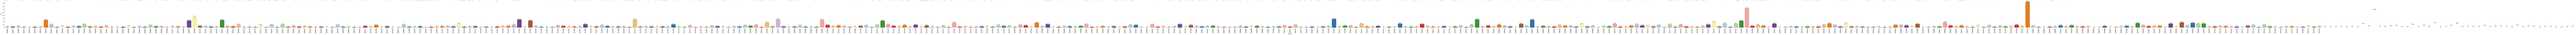

In [373]:
labeled_barplot(df, "ZIPCode")

**Observations on Family**

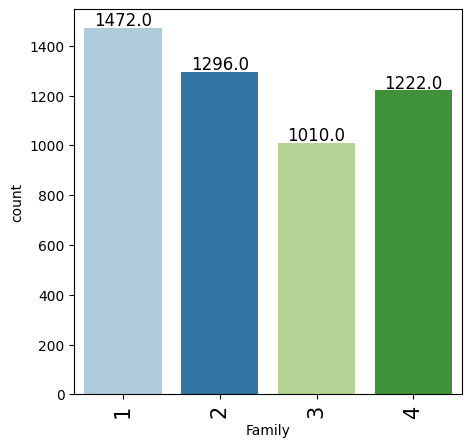

In [374]:
labeled_barplot(df, "Family")

**Observations on CCAvg**

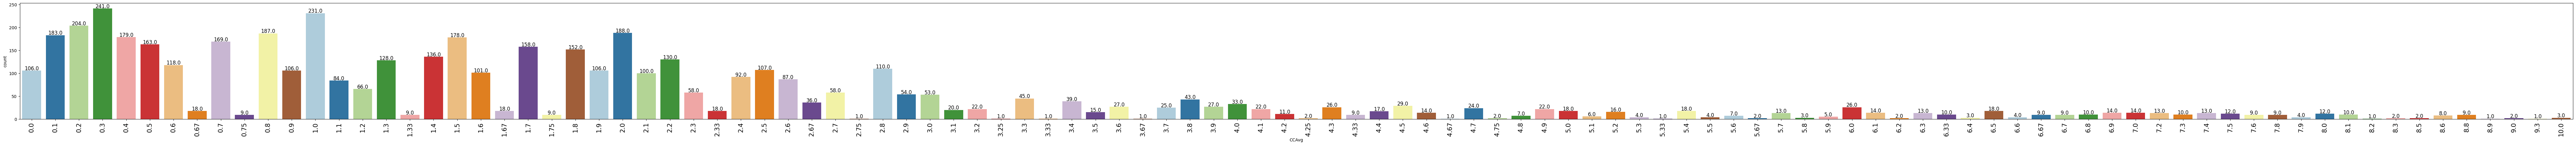

In [375]:
labeled_barplot(df, "CCAvg")

**Observations on Education**

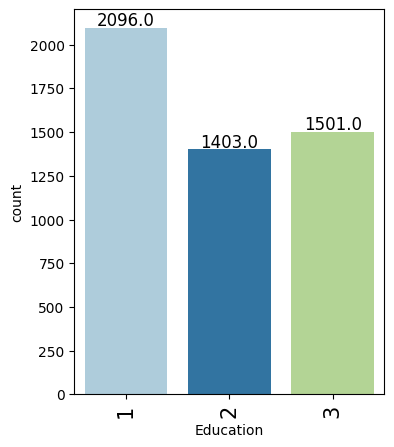

In [376]:
labeled_barplot(df, "Education")

**Observations on Mortgage**

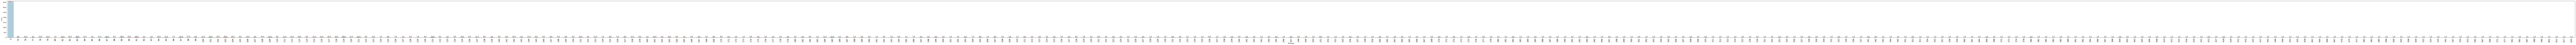

In [377]:
labeled_barplot(df, "Mortgage")

**Observations on Personal_Loan**

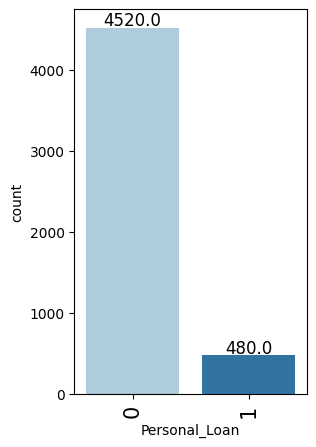

In [378]:
labeled_barplot(df, "Personal_Loan")

**Observations on Securities_Account**

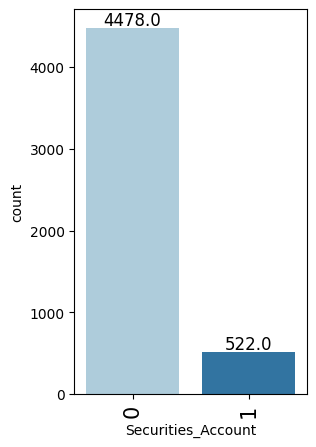

In [379]:
labeled_barplot(df, "Securities_Account")

**Observations on CD_Account**

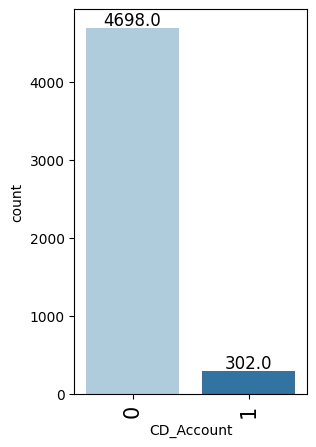

In [380]:
labeled_barplot(df, "CD_Account")

**Observations on Online**


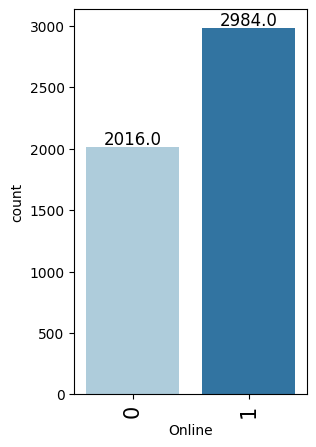

In [381]:
labeled_barplot(df, "Online")

**Observations on CreditCard**

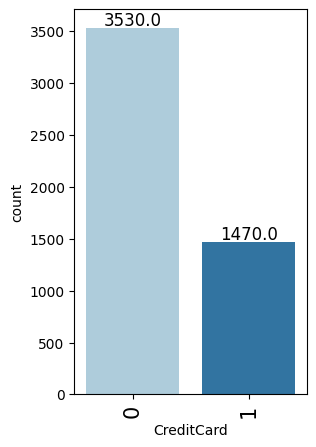

In [382]:
labeled_barplot(df, "CreditCard")

**Observation of correlation of all attributes**


# **Bivariate Analysis**

In [383]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [384]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of All Variables')

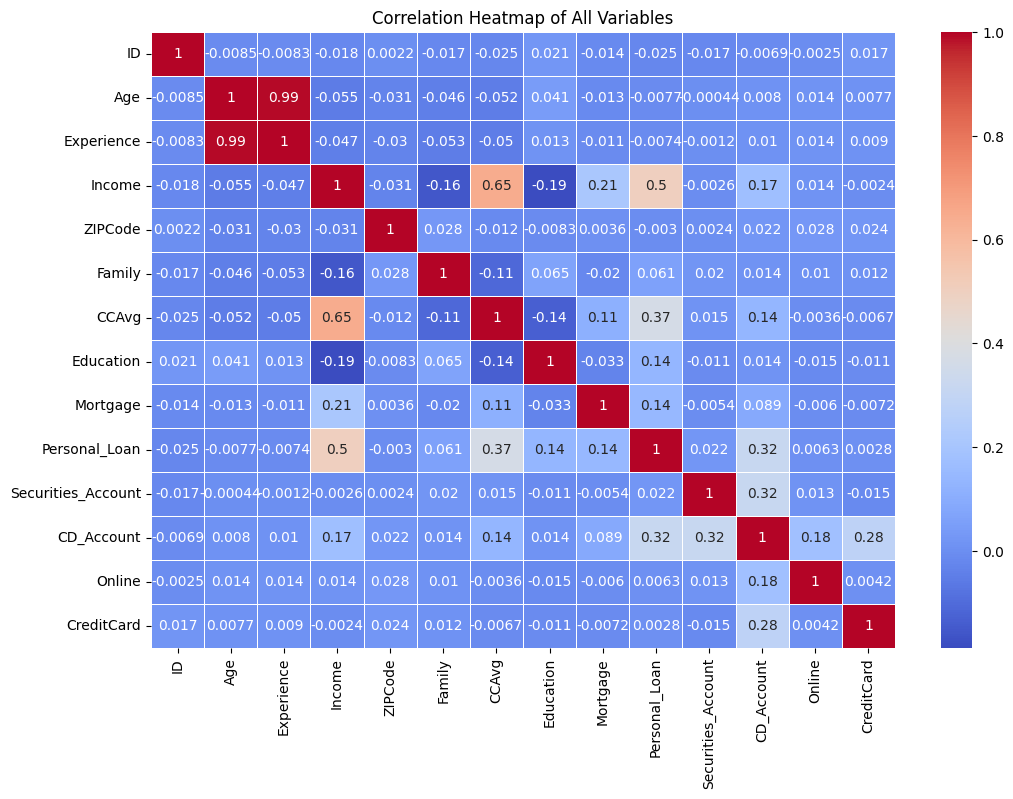

In [385]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Variables")

Let's investigate how different levels of education affect a customer's decision to take out a loan.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


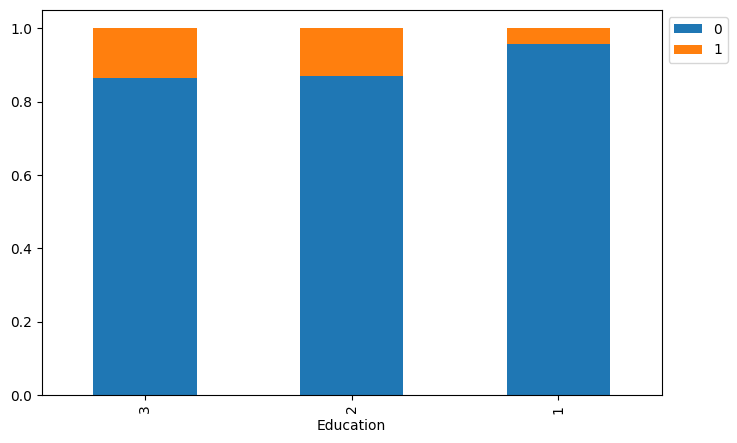

In [386]:
stacked_barplot(df, "Education", "Personal_Loan")

**Observations:**

Out of a total of 5,000 customers, 480 have taken a personal loan, while 4,520 have not.
Education Level 3 (Highest):

There are 1,501 customers with the highest level of education (coded as 3).
205 of these customers (13.7%) have taken a personal loan, while 1,296 (86.3%) have not.
Education Level 2 (Intermediate):

There are 1,403 customers with an intermediate level of education (coded as 2).
182 of these customers (13.0%) have taken a personal loan, while 1,221 (87.0%) have not.
Education Level 1 (Lowest):

There are 2,096 customers with the lowest level of education (coded as 1).
Only 93 of these customers (4.4%) have taken a personal loan, while 2,003 (95.6%) have not.
Trend:

Customers with higher education levels (coded as 3) are more likely to take out a personal loan compared to those with lower education levels (coded as 1).

**Personal_Loan vs Family**

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


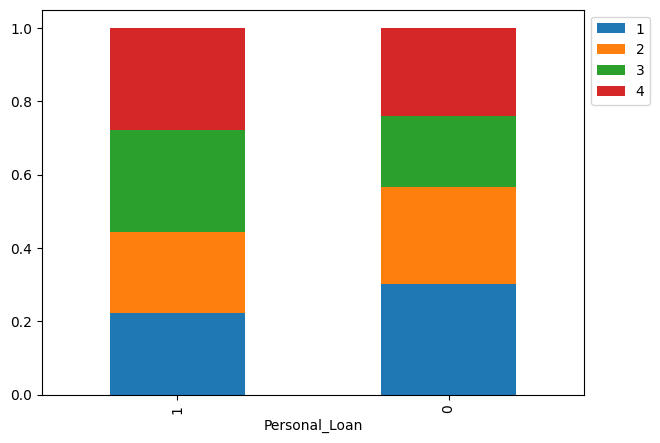

In [387]:
stacked_barplot(df, "Personal_Loan", "Family")

**Observations:**

The total number of customers is 5,000, with 1,472 belonging to family size 1, 1,296 to family size 2, 1,010 to family size 3, and 1,222 to family size 4.
Among these, 480 customers have taken a personal loan, while 4,520 have not.
Family Size 1:

There are 1,472 customers with a family size of 1.
107 of these customers (7.3%) have taken a personal loan, while 1,365 (92.7%) have not.
Family Size 2:

There are 1,296 customers with a family size of 2.
106 of these customers (8.2%) have taken a personal loan, while 1,190 (91.8%) have not.
Family Size 3:

There are 1,010 customers with a family size of 3.
133 of these customers (13.2%) have taken a personal loan, while 877 (86.8%) have not.
Family Size 4:

There are 1,222 customers with a family size of 4.
134 of these customers (11.0%) have taken a personal loan, while 1,088 (89.0%) have not.
Trend:

Customers with a family size of 3 are the most likely to take a personal loan, with 13.2% having done so. This is followed by those with a family size of 4 (11.0%) and family size 2 (8.2%).
Customers with a family size of 1 are the least likely to take a personal loan, with only 7.3% having done so.

**Personal_Loan vs Securities_Account**

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


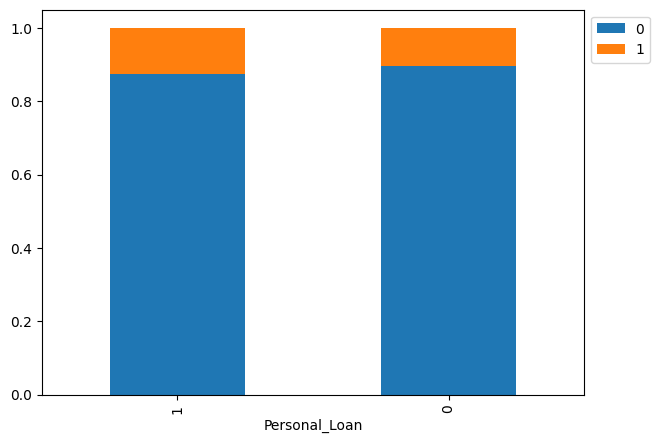

In [388]:
stacked_barplot(df, "Personal_Loan", "Securities_Account")

**Observations:**

Out of 5,000 total customers, 522 have a securities account, while 4,478 do not.
Among the customers, 480 have taken a personal loan, while 4,520 have not.
Customers Without a Securities Account:

There are 4,478 customers without a securities account.
420 of these customers (9.4%) have taken a personal loan, while 4,058 (90.6%) have not.
Customers With a Securities Account:

There are 522 customers with a securities account.
60 of these customers (11.5%) have taken a personal loan, while 462 (88.5%) have not.
Trend:

Customers with a securities account are slightly more likely to take a personal loan, with 11.5% of them doing so, compared to 9.4% of customers without a securities account.
The majority of customers, regardless of whether they have a securities account, have not taken a personal loan.

**Personal_Loan vs CD_Account**

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


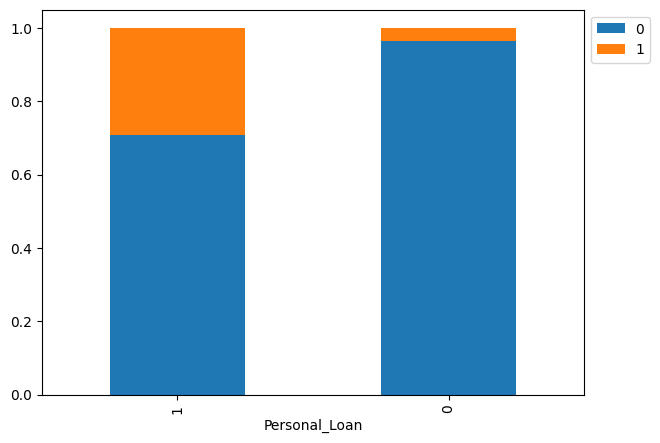

In [389]:
stacked_barplot(df, "Personal_Loan", "CD_Account")

**Personal_Loan vs Online**

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


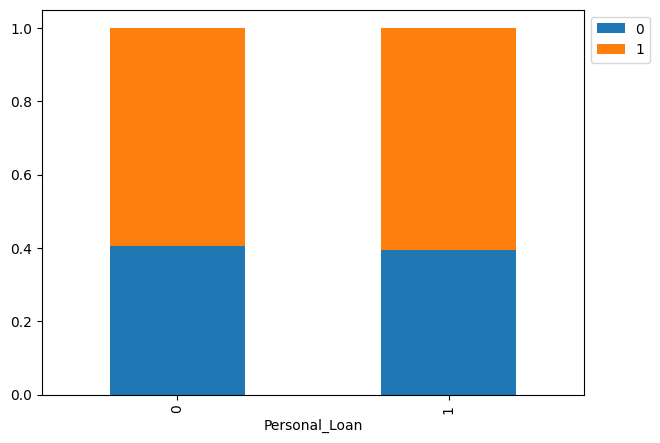

In [390]:
stacked_barplot(df, "Personal_Loan", "Online")

**Observations:**

Out of 5,000 customers, 2,984 use online services, while 2,016 do not.
Among all customers, 480 have taken a personal loan, while 4,520 have not.
Customers Not Using Online Services:

There are 2,016 customers who do not use online services.
189 of these customers (9.4%) have taken a personal loan, while 1,827 (90.6%) have not.
Customers Using Online Services:

There are 2,984 customers who use online services.
291 of these customers (9.8%) have taken a personal loan, while 2,693 (90.2%) have not.
Trend:

The likelihood of taking a personal loan is similar for both customers who use online services and those who do not. Customers who use online services have a slightly higher likelihood (9.8%) of taking a personal loan compared to those who do not use online services (9.4%).
The majority of customers, regardless of whether they use online services, have not taken a personal loan.


Personal_Loan vs CreditCard

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


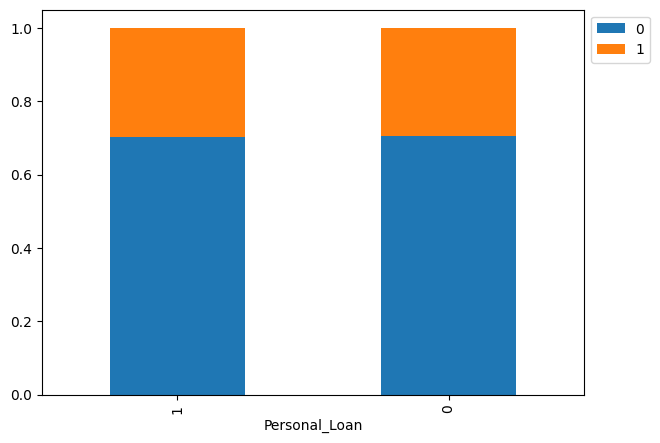

In [391]:
stacked_barplot(df, "Personal_Loan", "CreditCard")

**Observations:**

Out of 5,000 customers, 1,470 have a credit card, while 3,530 do not.
Among all customers, 480 have taken a personal loan, while 4,520 have not.
Customers Without a Credit Card:

There are 3,530 customers without a credit card.
337 of these customers (9.5%) have taken a personal loan, while 3,193 (90.5%) have not.
Customers With a Credit Card:

There are 1,470 customers with a credit card.
143 of these customers (9.7%) have taken a personal loan, while 1,327 (90.3%) have not.
Trend:

The likelihood of taking a personal loan is similar for both customers with and without a credit card. Customers with a credit card have a slightly higher likelihood (9.7%) of taking a personal loan compared to those without a credit card (9.5%).
The majority of customers, regardless of whether they have a credit card, have not taken a personal loan.


**Personal_Loan vs ZIPCode**

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


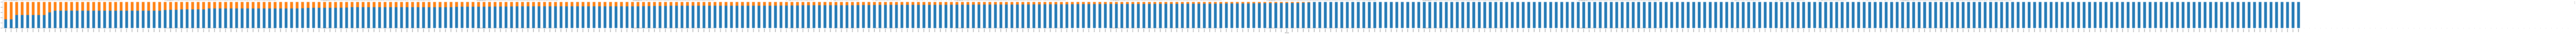

In [392]:
stacked_barplot(df, "ZIPCode", "Personal_Loan")

**Customer's interest in purchasing a loan varies with their age**

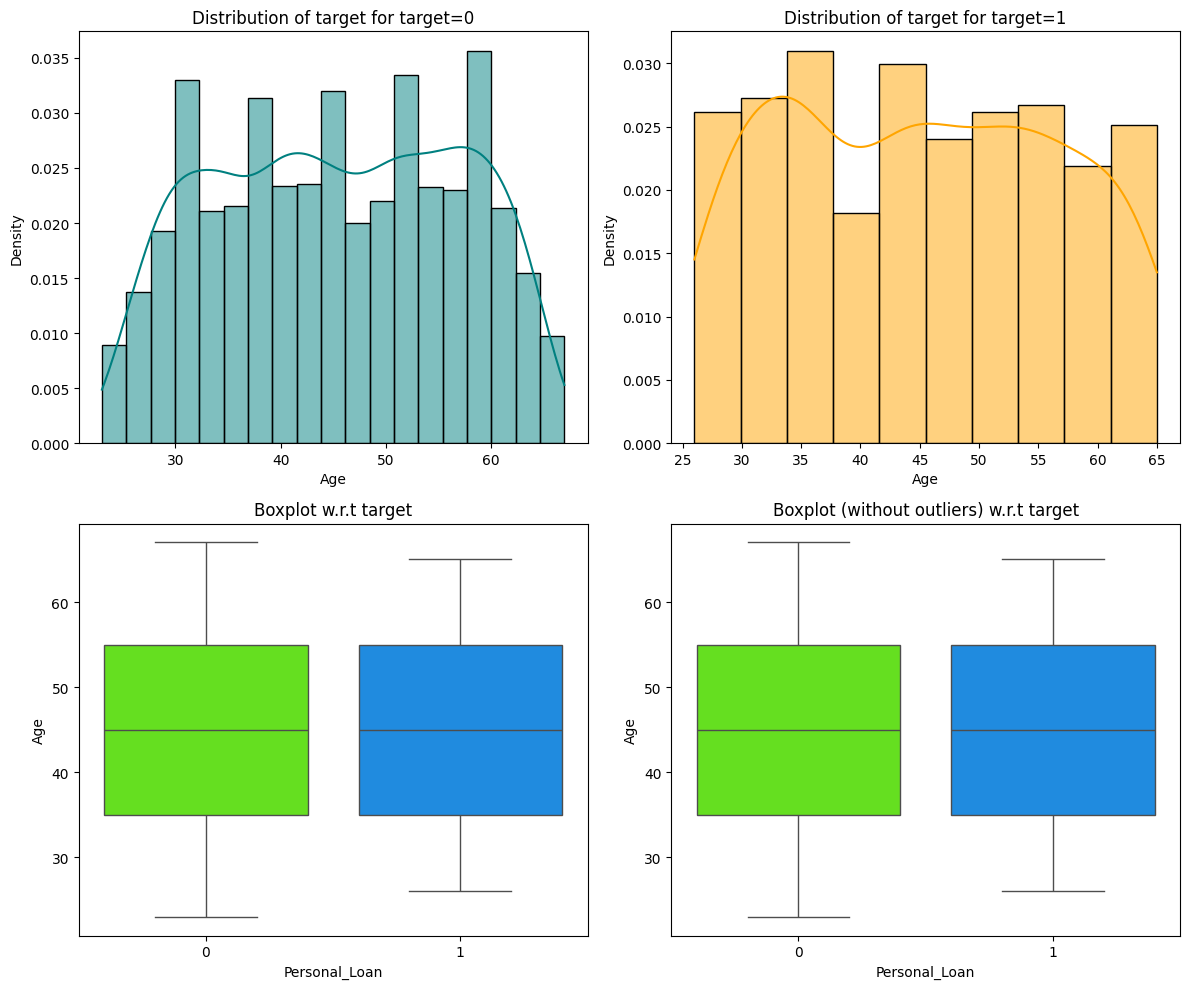

In [393]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

**Observations:**

Median Age: The median age is consistent across both categories of "personal_Loan" (0 and 1), with a median age of 45 for both groups. This indicates that the central tendency of age is similar whether or not an individual has taken a personal loan.

Outliers: There are no outliers present in either category (personal loan 0 or 1). This implies that the age data is evenly distributed without any extreme values that could skew the analysis.

Overall Trends: The boxplot reveals that the distribution of ages is fairly uniform across individuals who have taken a personal loan and those who have not. The absence of outliers and similar median values suggest that age does not significantly differ between the two groups in the context of this dataset.

**Personal Loan vs Income**

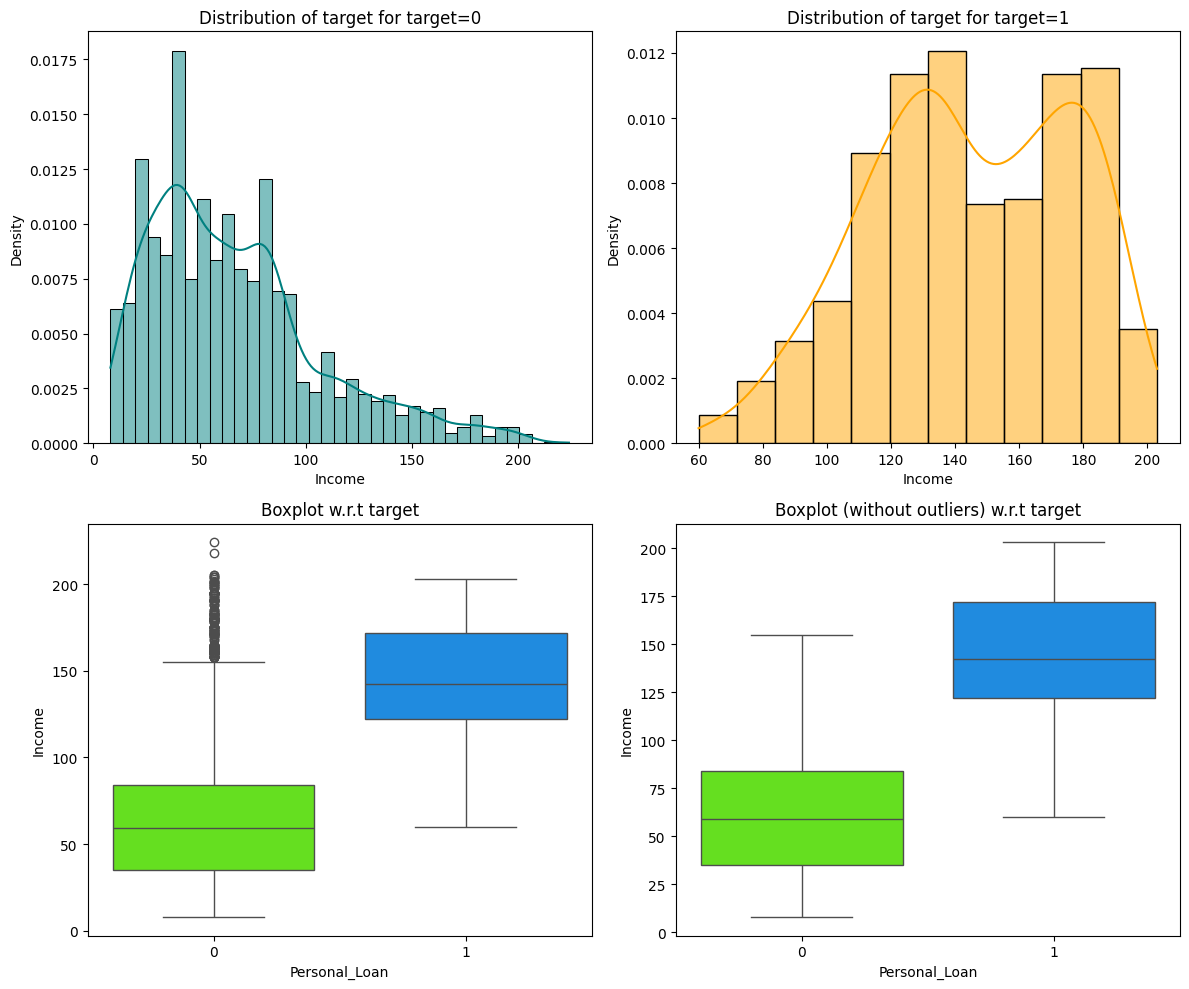

In [394]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

**Observations:**

The histogram for individuals who have not taken a personal loan shows a right-skewed distribution. This means that most individuals in this group have lower income, with fewer individuals earning higher incomes. The long tail to the right represents the higher income outliers.
Income Distribution for Personal_Loan = 1:

The histogram for individuals who have taken a personal loan shows a left-skewed distribution. This indicates that most individuals in this group have higher income, with fewer individuals earning lower incomes. The long tail to the left represents the lower income levels within this group.


**Personal Loan vs Experience**

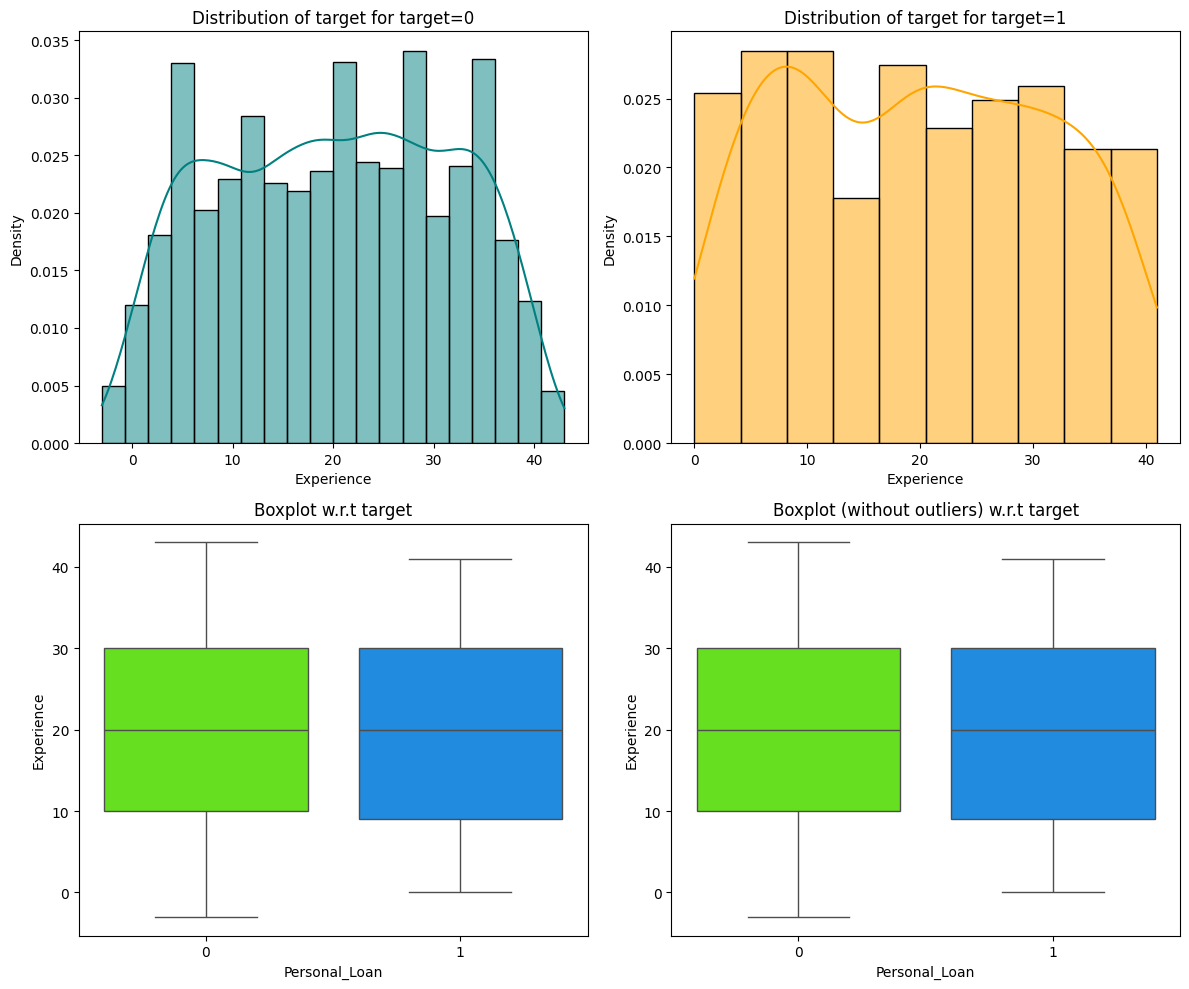

In [395]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

**Observations:**

Median Experience: The median years of experience are approximately 20 for both categories of "personal_Loan" (0 and 1). This indicates that, on average, individuals who have taken a personal loan and those who have not share a similar level of work experience.

Outliers: There are no outliers present in either category (personal loan 0 or 1). This implies that the experience data is well-contained within a typical range, with no extreme values that could distort the analysis.

Overall Trends: The boxplot suggests that years of experience are similarly distributed among individuals with and without a personal loan. The consistency in median experience and the absence of outliers indicate that work experience does not significantly differ between the two groups.ake personal loans, while lower-income individuals are less likely to do so.

**Personal Loan vs CCAvg**

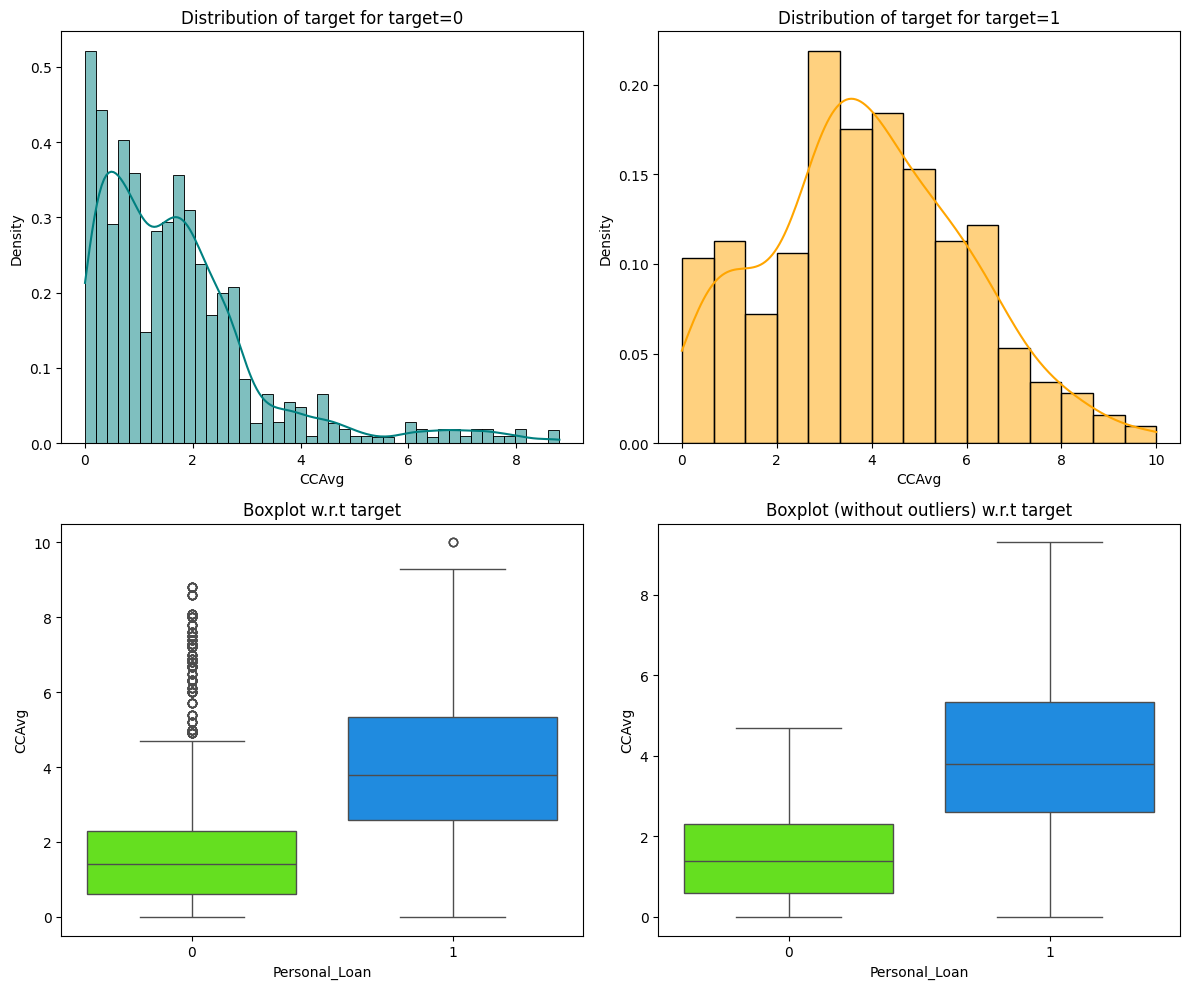

In [396]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

**Observations:**

The median credit card average spending (CCAvg) for individuals who did not take a personal loan is 0.75, with outliers appearing after 5. In contrast, those who took a personal loan have a significantly higher median CCAvg of 4, with a few outliers beyond 9. This indicates that individuals with higher credit card spending are more likely to take personal loans.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

  The distribution of the mortgage attribute shows noticeable patterns and outliers. In the boxplot for Mortgage, a significant number of outliers are present, indicating that there are values far removed from the central tendency. The histogram further illustrates that the majority of values are clustered between 0 to 10, with a count of 3,400. As the mortgage values increase beyond 90 to 100, the count sharply drops to 200, and it continues to decrease as the mortgage amount increases. This pattern suggests that most individuals have relatively low mortgage amounts, with fewer people having higher mortgage values, and the presence of outliers highlights a small number of exceptionally high mortgage amounts.


2. How many customers have credit cards?

  A total of 1,470 customers have credit cards.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

  The attributes that have a strong correlation with the target attribute (Personal Loan) are:
  Income with a correlation of 0.5
  CCAvg (Credit Card Average Spending) with a correlation of 0.37
  CD_Account (Certificate of Deposit Account) with a correlation of 0.32
  These attributes suggest a notable relationship with whether a customer has taken a personal loan.


4. How does a customer's interest in purchasing a loan vary with their age?

  A customer's interest in purchasing a loan does not appear to vary significantly with their age. Both those who have taken a personal loan and those who have not have a consistent median age of 45. The lack of outliers in the age data further indicates that age distribution is uniform across both groups, suggesting that age is not a major factor in the decision to take a personal loan.


5. How does a customer's interest in purchasing a loan vary with their education?

  The customer's interest in purchasing a loan does not seem to vary significantly with their level of experience, as both individuals who have taken a personal loan and those who have not share a similar median of approximately 20 years of experience. The absence of outliers in both categories further indicates that experience is consistently distributed among both groups. This suggests that the decision to take a personal loan is not strongly influenced by the customer's work experience.

# **Data Preprocessing**

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Drop ID**

In [397]:
df = df.drop("ID", axis=1)

**Missing value**

In [398]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**

There are no missing values in the dataset

**Checking for duplicate values**

In [399]:
df.duplicated().sum()

0

**Observations:**

There are no duplicate values in the data.

**Checking for Anomalous Values**

In [400]:
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

**Treating the negative values of Experience**

In [401]:
df["Experience"].value_counts()

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

In [402]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [403]:
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [404]:
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [405]:
df["Education"].unique()

array(['Undergraduate', 'Graduate', 'Professional'], dtype=object)

**Feature Engineering**

In [406]:
df["ZIPCode"].nunique()

467

In [407]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [408]:
df.head()

Age  Experience  Income ZIPCode  Family  CCAvg      Education  Mortgage  \
0   25           1      49      91       4    1.6  Undergraduate         0   
1   45          19      34      90       3    1.5  Undergraduate         0   
2   39          15      11      94       1    1.0  Undergraduate         0   
3   35           9     100      94       1    2.7       Graduate         0   
4   35           8      45      91       4    1.0       Graduate         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [409]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
df[cat_cols] = df[cat_cols].astype("category")

In [410]:
df.head()

Age  Experience  Income ZIPCode  Family  CCAvg      Education  Mortgage  \
0   25           1      49      91       4    1.6  Undergraduate         0   
1   45          19      34      90       3    1.5  Undergraduate         0   
2   39          15      11      94       1    1.0  Undergraduate         0   
3   35           9     100      94       1    2.7       Graduate         0   
4   35           8      45      91       4    1.0       Graduate         0   

  Personal_Loan Securities_Account CD_Account Online CreditCard  
0             0                  1          0      0          0  
1             0                  1          0      0          0  
2             0                  0          0      0          0  
3             0                  0          0      0          0  
4             0                  0          0      0          1

**Outlier Detection**

In [411]:
Q1 = df.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = df.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR



In [412]:
Q1

Age           35.0
Experience    10.0
Income        39.0
Family         1.0
CCAvg          0.7
Mortgage       0.0
Name: 0.25, dtype: float64

In [413]:
Q3

Age            55.0
Experience     30.0
Income         98.0
Family          3.0
CCAvg           2.5
Mortgage      101.0
Name: 0.75, dtype: float64

In [414]:
(
    (df.select_dtypes(include=["float64", "int64"]) < lower)
    | (df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

**Observations:**

ID, Age, Experience, Family: Have 0.00% outliers

Income: Has 1.92% outliers

CCAvg: Has 6.48% outliers

Mortgage: Has 5.82% outliers

# **Data Preparation for Modeling**

In [415]:
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

In [416]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


# **Model Building**

### Model Evaluation Criterion

### Model Building

Functions to calculate different metrics

In [417]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [418]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# **Build Decision Tree Model**

In [419]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

**Checking model performance on training data**

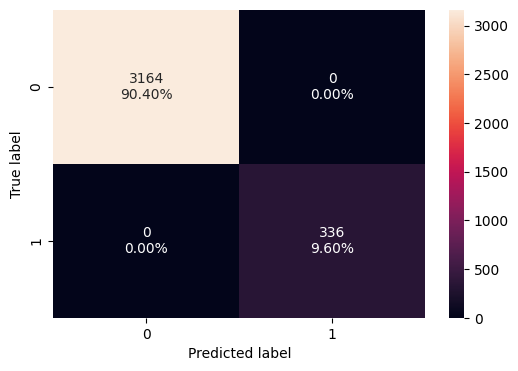

In [420]:
confusion_matrix_sklearn(model, X_train, y_train)

In [421]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [422]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.979333  0.902778   0.884354  0.893471

**Visualizing the Decision Tree**

In [423]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


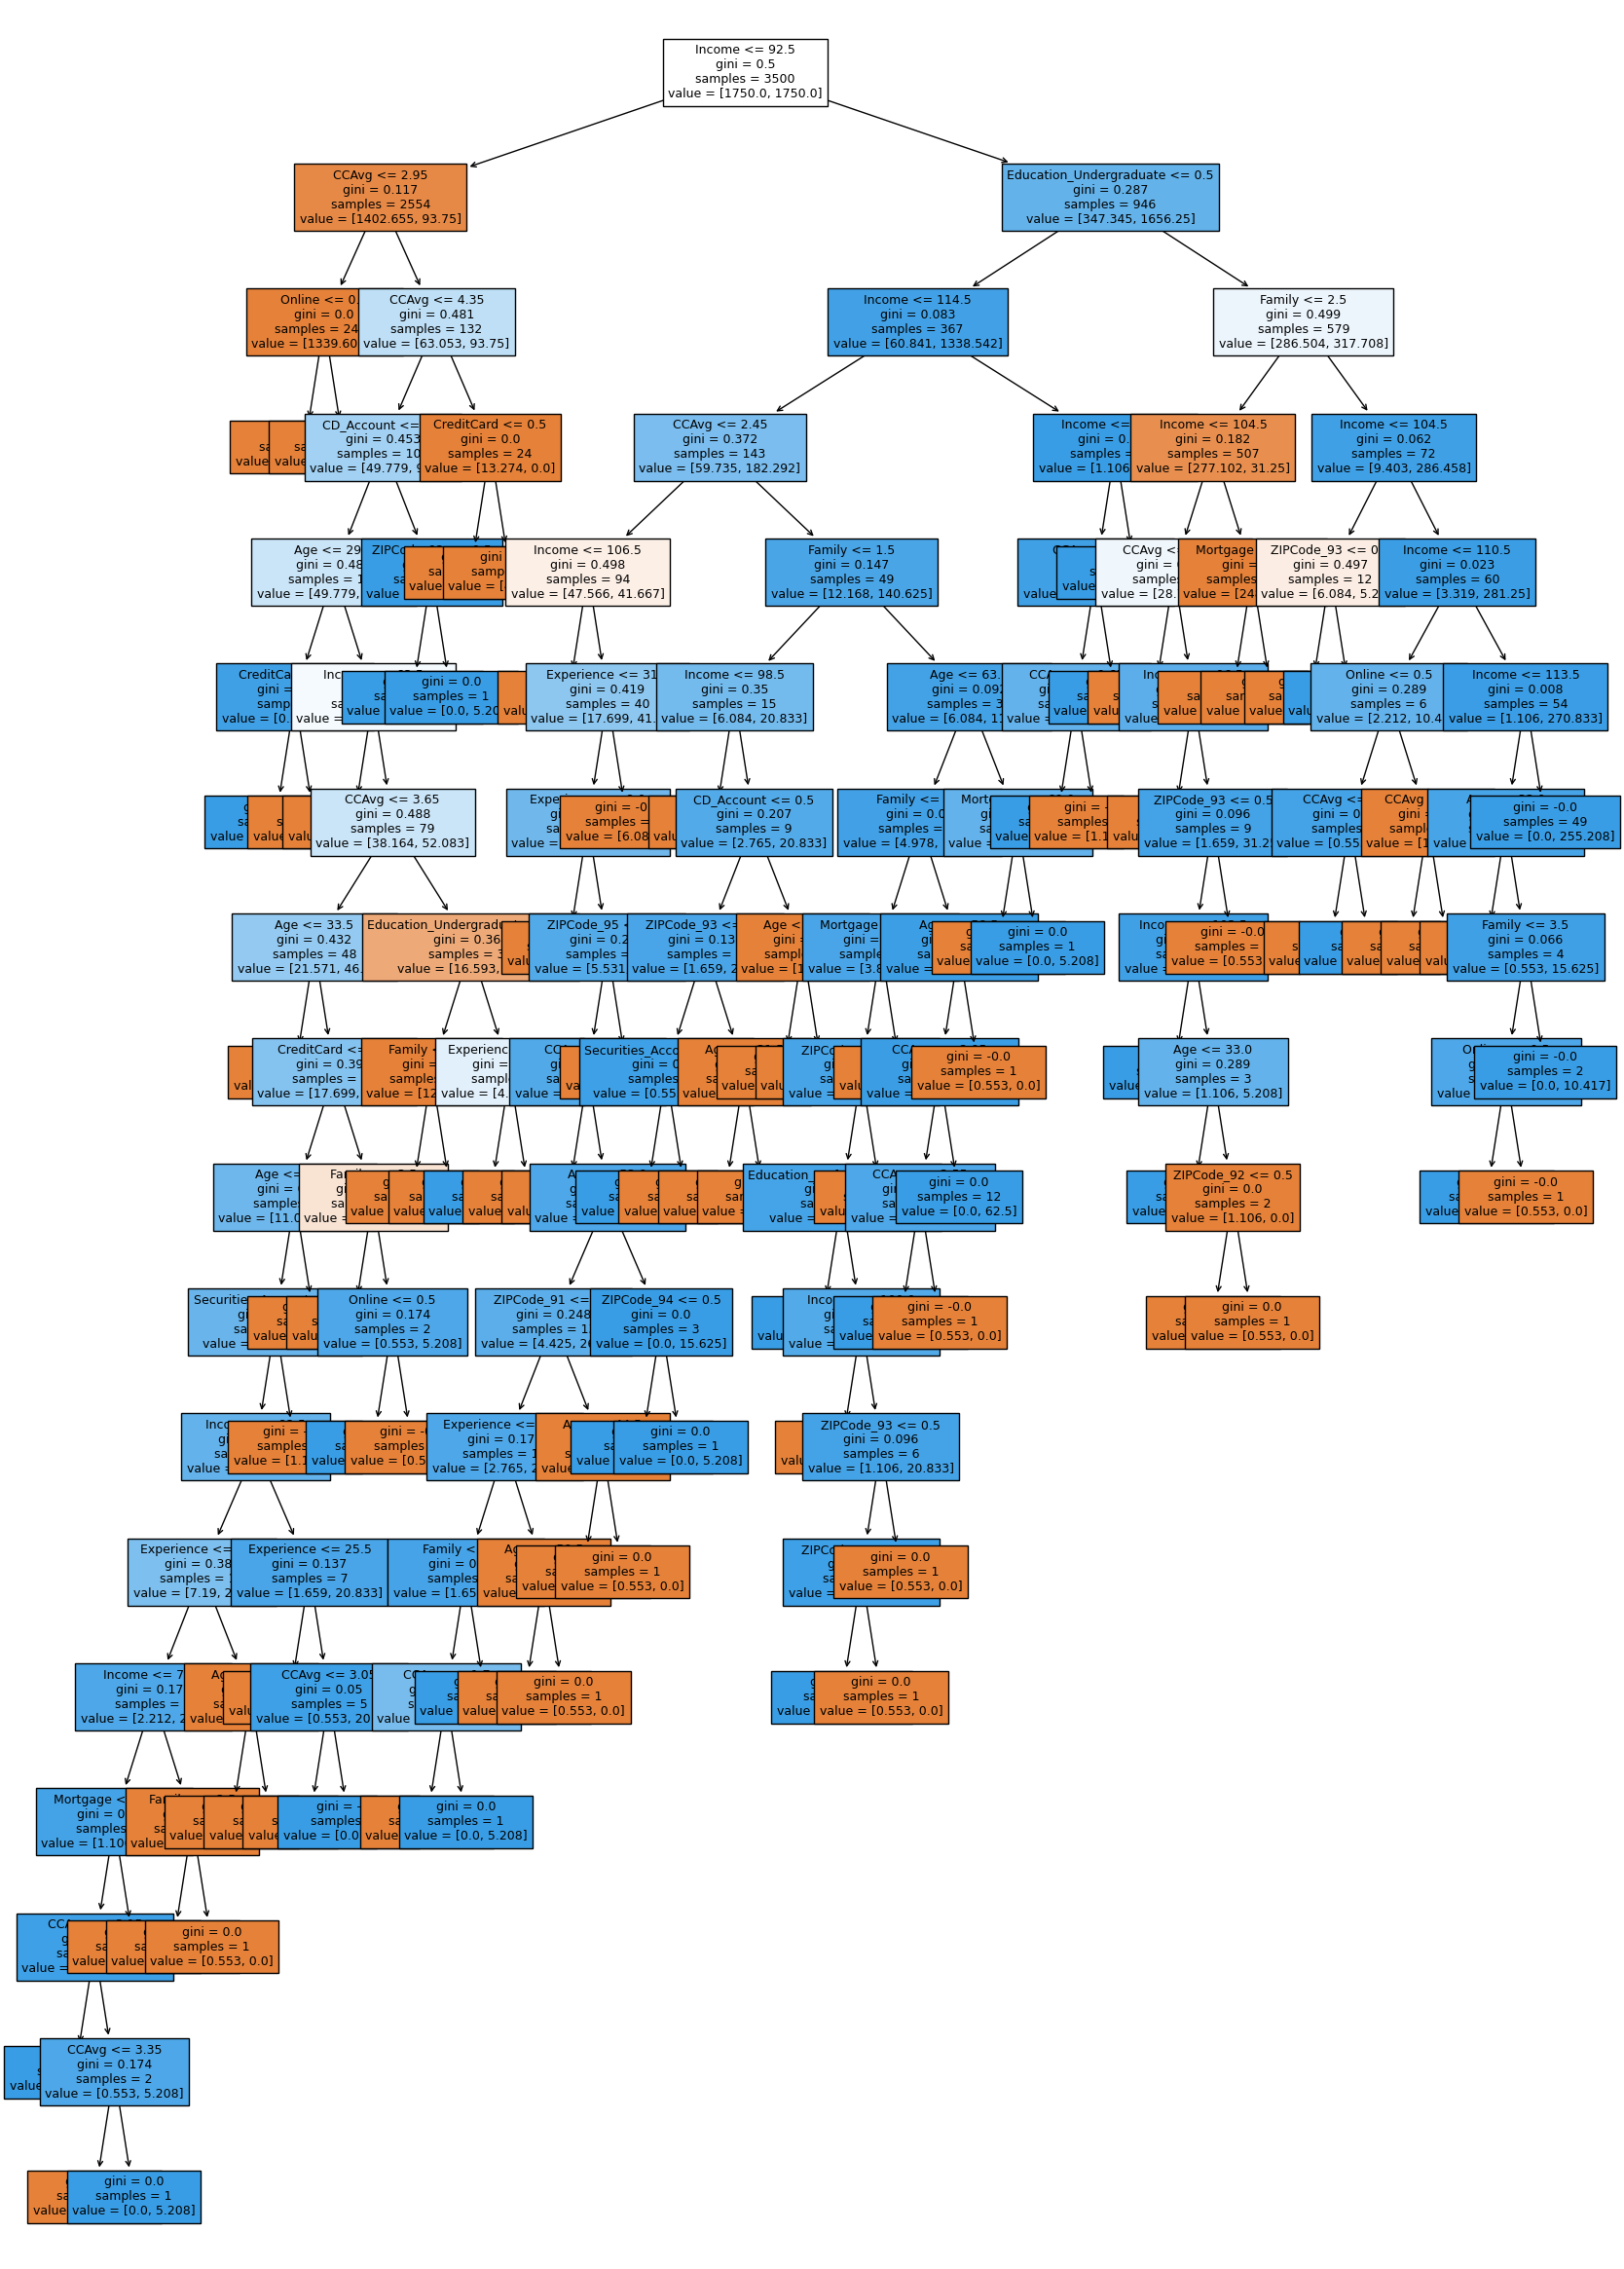

In [424]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [425]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Online <= 0.50
|   |   |   |--- weights: [537.06, 0.00] class: 0
|   |   |--- Online >  0.50
|   |   |   |--- weights: [802.54, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.35
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 15.62] class: 1
|   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |--- Age >  29.50
|   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |--- weights: [11.06, 0.00] class: 0
|   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |--- weights: [3.87, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |  

In [426]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Income                   6.286238e-01
Family                   1.337413e-01
CCAvg                    9.764537e-02
Education_Undergraduate  9.126275e-02
Experience               1.738912e-02
Age                      8.860159e-03
ZIPCode_93               5.512110e-03
CD_Account               5.407144e-03
Online                   2.628123e-03
Mortgage                 2.172750e-03
CreditCard               1.968694e-03
ZIPCode_91               1.465312e-03
Securities_Account       1.457414e-03
ZIPCode_95               1.114246e-03
ZIPCode_92               5.574319e-04
Education_Professional   1.943021e-04
ZIPCode_94               3.965082e-18
ZIPCode_96               0.000000e+00


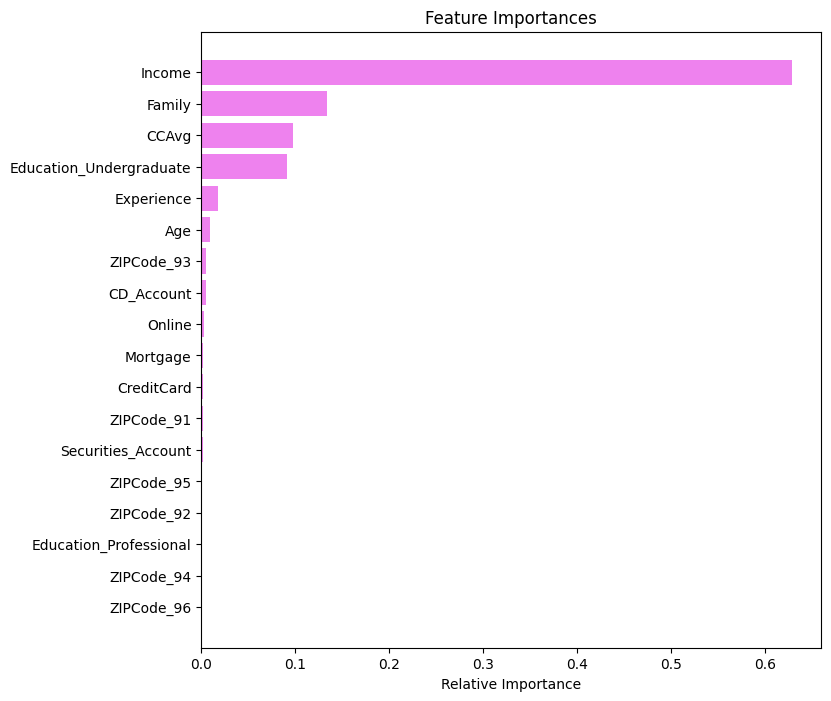

In [427]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

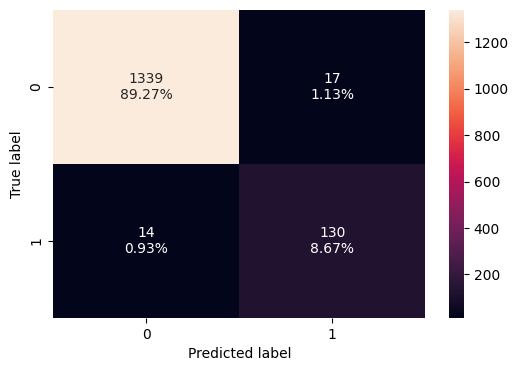

In [428]:
confusion_matrix_sklearn(model, X_test, y_test)

In [429]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.979333  0.902778   0.884354  0.893471

# **Model Performance Improvement**

# **Pre-Pruning**

In [430]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=42)

In [431]:
grid_obj.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

**performance on training data**

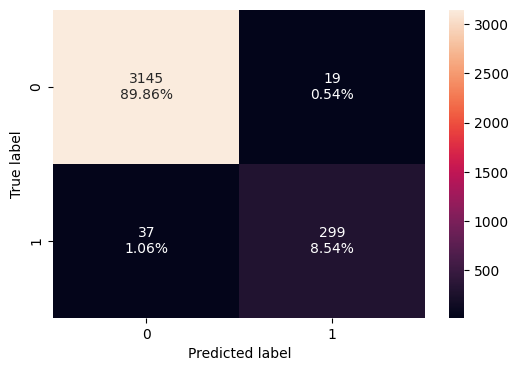

In [432]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [433]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0     0.984  0.889881   0.940252  0.914373

**Visualizing the Decision Tree**

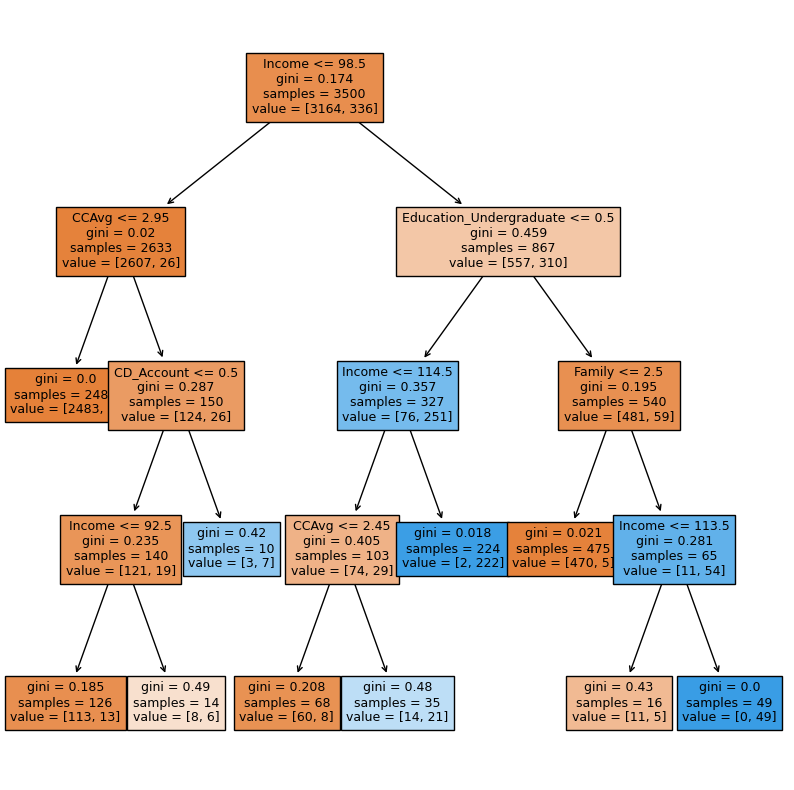

In [434]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [435]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [113.00, 13.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [8.00, 6.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 7.00] class: 1
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [60.00, 8.00] class: 0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [14.00, 21.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [470.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [11.00, 5.00] class: 0
|   |   |   |--- Income > 

In [436]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.465603
Education_Undergraduate  0.338540
Family                   0.147539
CCAvg                    0.036920
CD_Account               0.011398
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Experience               0.000000
Online                   0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CreditCard               0.000000


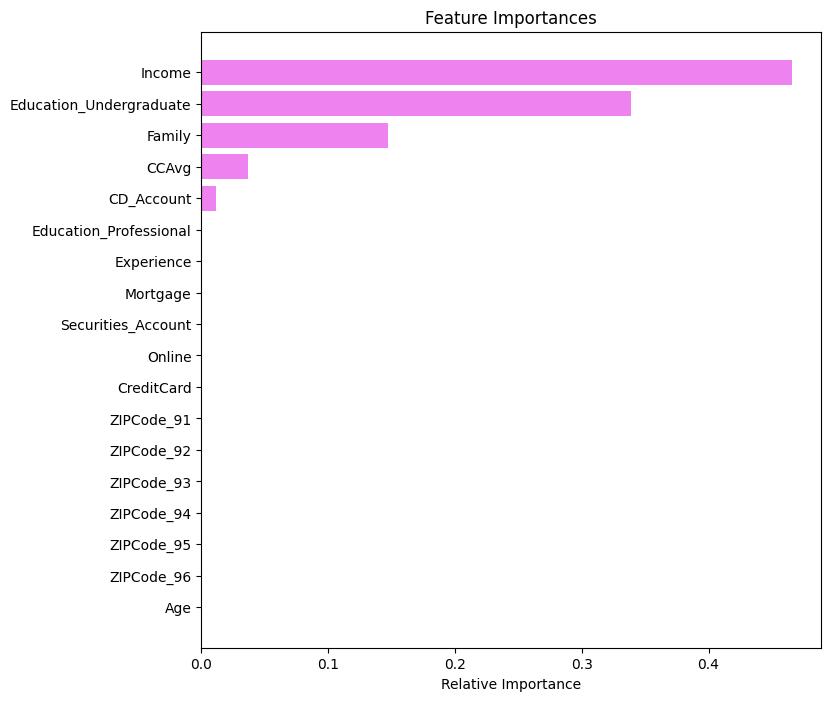

In [437]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Performance on test data (Pre-Pruning)**

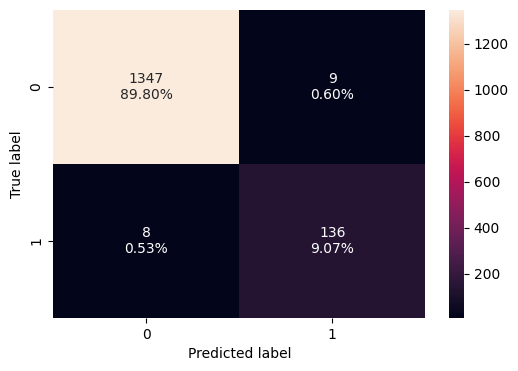

In [438]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [439]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.988667  0.944444   0.937931  0.941176

# **Cost-Complexity Pruning (Post Pruning)**

In [440]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [441]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000270    0.000540
2     0.000275    0.001090
3     0.000281    0.001651
4     0.000286    0.001937
5     0.000287    0.003660
6     0.000378    0.004792
7     0.000381    0.005173
8     0.000381    0.005554
9     0.000381    0.005935
10    0.000381    0.006316
11    0.000381    0.006697
12    0.000381    0.007459
13    0.000411    0.009103
14    0.000426    0.010806
15    0.000429    0.011235
16    0.000429    0.011664
17    0.000457    0.012121
18    0.000476    0.012597
19    0.000476    0.013073
20    0.000476    0.015931
21    0.000500    0.016431
22    0.000514    0.016945
23    0.000655    0.019564
24    0.000688    0.020252
25    0.000743    0.020994
26    0.000771    0.021766
27    0.000777    0.022543
28    0.000933    0.025341
29    0.001698    0.027040
30    0.002429    0.029468
31    0.003072    0.032540
32    0.003258    0.035798
33    0.020297    0.056095
34    0.021982    0.078076
35    0.047746    0.173568

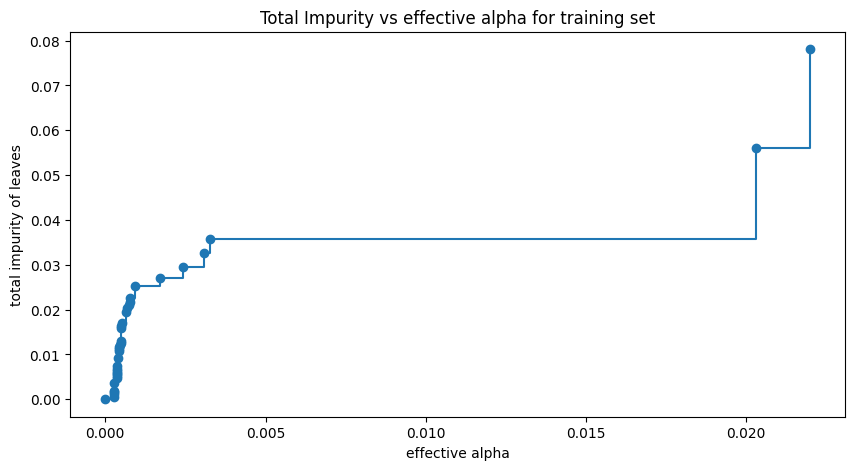

In [442]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observations:**

The graph of ccp_alphas versus impurities initially shows a gradual increase in impurity as alpha values rise, reflecting minimal pruning, followed by a steady rise as the tree is pruned more aggressively, and ultimately a sharp spike in impurity, indicating significant over-pruning and the critical trade-off between model simplicity and predictive accuracy.

In [443]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04774589891961516


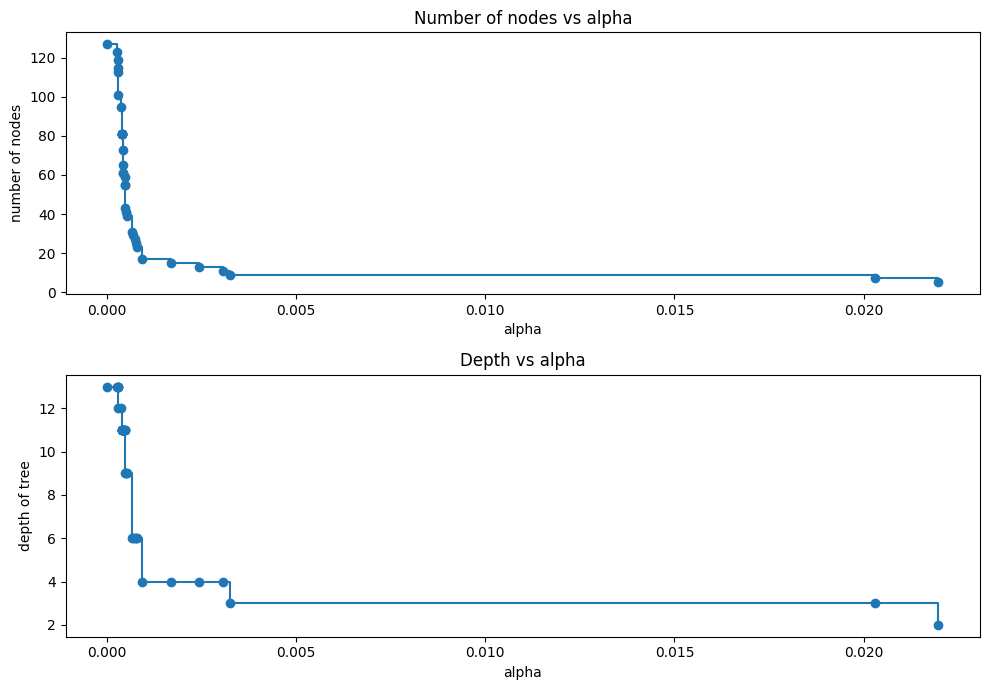

In [444]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations:**

As alpha increases from 0.0 to 0.002, the number of nodes in the decision tree decreases drastically from over 120 to around 20, and further pruning at alpha 0.020 reduces the nodes to approximately 10, illustrating a significant trade-off between model complexity and generalization.

As alpha increases from 0.01 to 0.020, the depth of the decision tree decreases significantly from over 12 to around 3, indicating that higher alpha values lead to more aggressive pruning, resulting in a much simpler and shallower tree structure.

**Recall vs alpha for training and testing sets**

In [445]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

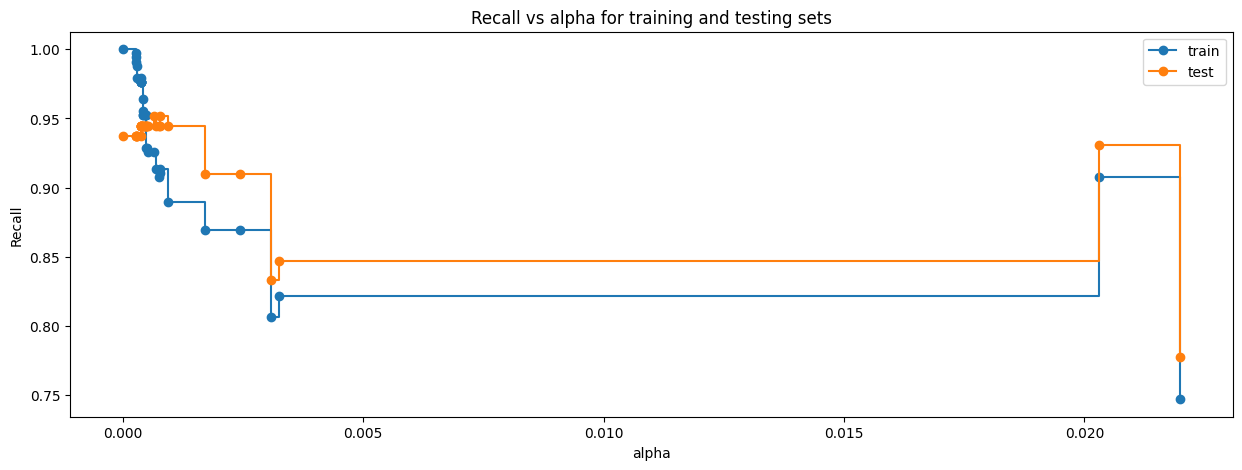

In [446]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observations:**

When alpha is around 0.00, the decision tree achieves perfect recall of 1.0 on the training data but slightly lower recall of 0.95 on the test data, indicating potential overfitting. As alpha increases to 0.002, recall for training data decreases to 0.87 while test recall improves to 0.94, and with alpha at 0.02, training recall rises to 0.92 and test recall reaches 0.91, demonstrating a more balanced model with reduced overfitting and improved generalization.

In [447]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006545566502463055, random_state=42)


**Post-Purning**

In [448]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006545566502463055, class_weight='balanced', random_state=42         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006545566502463055, class_weight='balanced',
                       random_state=42)

**Checking performance on training data**

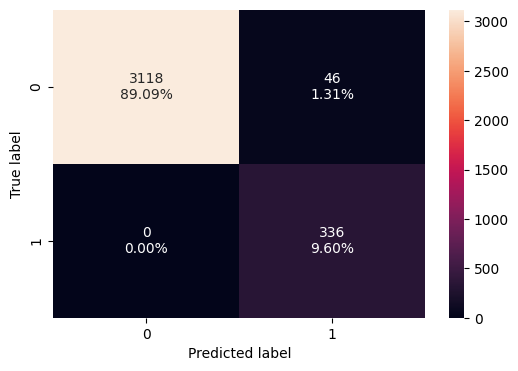

In [449]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

Observations:

The model is good at predicting class 0, getting it right 89% of the time. However, it has trouble with class 1, correctly identifying it only 9.6% of the time. While it handles class 0 well, its difficulty with class 1 might be caused by an imbalance in the data.

In [450]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

Accuracy  Recall  Precision        F1
0  0.986857     1.0   0.879581  0.935933

Observations:

**Accuracy** (0.986857):

The model has an accuracy of approximately 98.7%, meaning it correctly predicts the overall outcome in 98.7% of cases. This indicates strong general performance.

**Recall** (1.0):

The recall is 1.0, or 100%, which means the model is perfectly identifying all true positive cases of the target class. In other words, it doesn't miss any actual positive instances.

**Precision** (0.879581):

The precision is about 87.96%, indicating that when the model predicts a positive case, it is correct 87.96% of the time. This suggests that some of the positive predictions might actually be false positives.

**F1 Score** (0.935933):

The F1 score is approximately 93.6%, which balances both precision and recall. A high F1 score indicates that the model is performing well in terms of both correctly identifying positive cases (recall) and minimizing false positives (precision).

**Visualizing the Decision Tree**

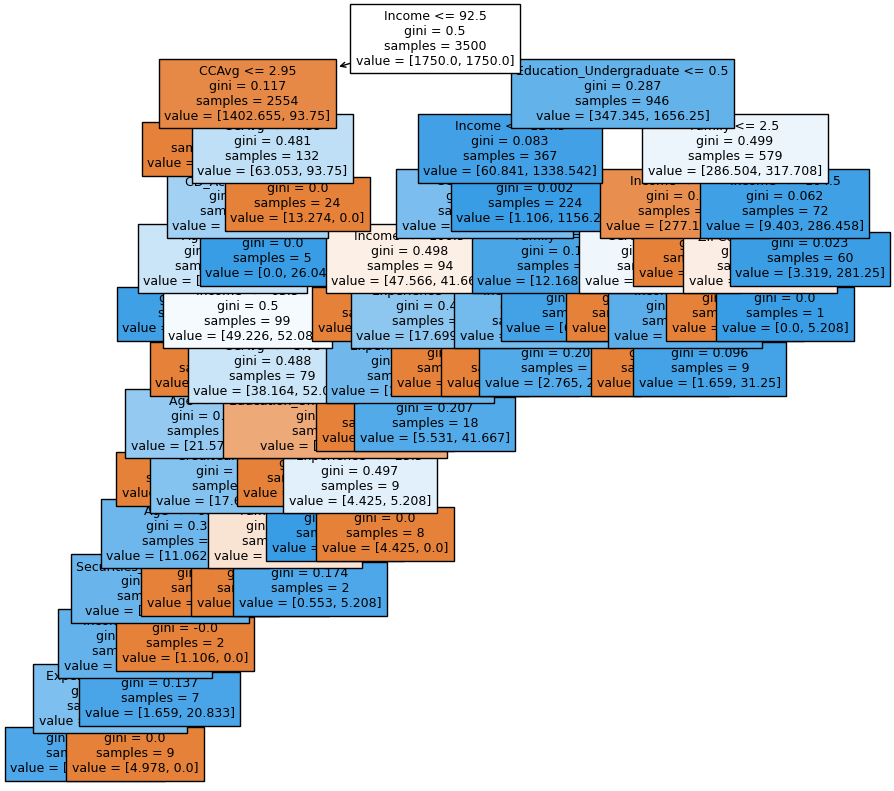

In [451]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [452]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1339.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.35
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |--- weights: [0.55, 15.62] class: 1
|   |   |   |   |--- Age >  29.50
|   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |--- weights: [11.06, 0.00] class: 0
|   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |--- weights: [3.87, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 60.50
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |

In [453]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.642618
Family                   0.136937
CCAvg                    0.094567
Education_Undergraduate  0.093798
Experience               0.015595
Age                      0.006433
CD_Account               0.004495
ZIPCode_93               0.003296
CreditCard               0.001396
Securities_Account       0.000865
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


**Feature Importance: Histogram Plot**

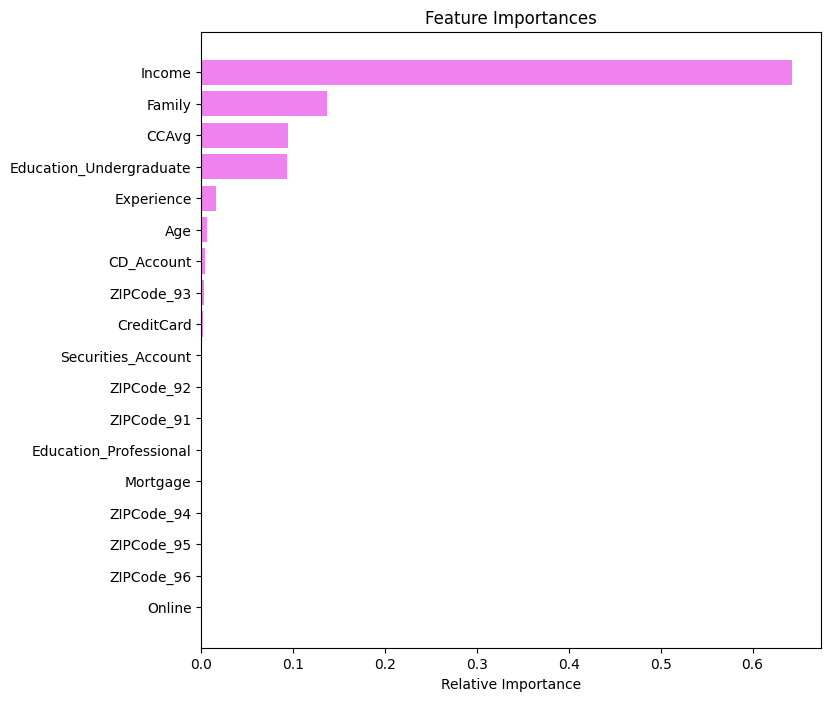

In [454]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

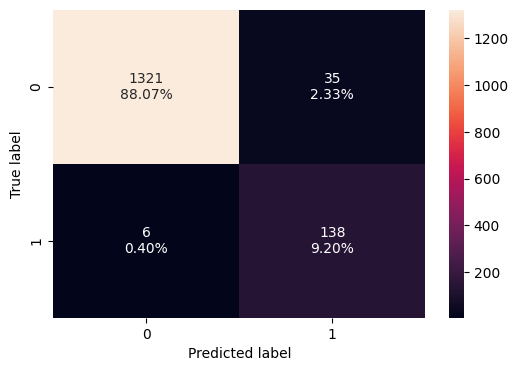

In [455]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

Observations:

The model accurately predicts class 0 with 88% accuracy and only a small misclassification rate of 2.33%, while it struggles with class 1, correctly identifying it only 9.2% of the time with a slight misclassification rate of 0.4%, indicating strong performance for class 0 but significant difficulty in detecting class 1.

In [456]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

Accuracy    Recall  Precision        F1
0  0.972667  0.958333   0.797688  0.870662

Observations:

**Accuracy** (0.972667):

The model has an accuracy of approximately 97.27%, meaning it correctly predicts the overall outcome in 97.27% of cases. This indicates strong general performance across all classes.

**Recall** (0.958333):

The recall is approximately 95.83%, which means the model correctly identifies 95.83% of the actual positive cases. The model has a high ability to detect true positives, but it misses around 4.17% of them.

**Precision** (0.797688):

The precision is approximately 79.77%, indicating that when the model predicts a positive case, it is correct about 79.77% of the time. This suggests that about 20.23% of the positive predictions are false positives, meaning the model has some room for improvement in terms of precision.

**F1 Score** (0.870662):

The F1 score is approximately 87.07%, which is a balance between precision and recall. This score indicates that the model performs well overall in both identifying positive cases and minimizing false positives, though there is some trade-off between these metrics.

# **Model Comparison and Final Model Selection**

In [457]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_tune_post_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.984000   
Recall                                 1.0                     0.889881   
Precision                              1.0                     0.940252   
F1                                     1.0                     0.914373   

           Decision Tree (Post-Pruning)  
Accuracy                       0.986857  
Recall                         1.000000  
Precision                      0.879581  
F1                             0.935933

In [458]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_tune_post_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.979333                     0.988667   
Recall                            0.902778                     0.944444   
Precision                         0.884354                     0.937931   
F1                                0.893471                     0.941176   

           Decision Tree (Post-Pruning)  
Accuracy                       0.972667  
Recall                         0.958333  
Precision                      0.797688  
F1                             0.870662

# **Actionable Insights and Business Recommendations**


* What recommedations would you suggest to the bank?

Post pruning Recall is 0.958333 and pre pruning Recall is 0.944444. So in this case post pruning is best model.

**Recommendations:**

*   Start programs to teach money management and offer basic financial products to low-income customers with incomes less than or equal to 92.50 and low credit card usage, to encourage them to use more banking services.

*   Provide attractive interest rates and easy access to CD accounts for customers with incomes less than or equal to 92.50 and moderate credit card usage, to help them save more and get more involved with the bank.

*   Create special promotions or rewards to increase credit card usage among younger customers, age 29.50 or younger, who have moderate credit card usage.

*   Offer custom credit card products or incentives to high-income customers (with income over 92.50) who currently don't have a credit card, to turn them into loyal credit card users.

*   Provide family-focused financial services like joint accounts or education savings plans for customers with larger families (more than 2.50 members) and incomes over 104.50, to strengthen their relationship with the bank.

*   Offer personalized financial planning and wealth management services to older customers (with more than 31.50 years of experience and incomes over 106.50) to keep them as long-term bank clients.

*   Develop financial products like student loan refinancing or savings accounts for continuing education to attract educated customers with an undergraduate degree and incomes over 96.50.

___